# UNIT 2  GROUP WORK - Data Engineering for Health Data Science

#### Team Boolean members:
- Sol Andres
- Peter Edwards
- Kamal Masarweh

<a id="top"></a>

<b>Table of contents</b><br>

PART 1 -  [QUANTITIES & COSTS](#quantity)

PART 2 - [GEOGRAPHICAL DATA](#geographical)

PART 3 - [PRACTICE LEVEL DATA](#practice)

In [1]:
# Settings

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np # for creating graphs from 2 series

# script for changeing figure size & dpi
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10,4, forward=True) ##To propagate the size change to an existing GUI window, add forward=True:
fig.set_dpi(100)

# read the CSV file
epd_20 = pd.read_csv('EPD_202004.csv')
epd_21 = pd.read_csv('EPD_202104.csv')


<Figure size 1000x400 with 0 Axes>

<a id="quantity"></a>
# Part 1 : QUANTITIES & COSTS


### 1.1 QUANTITIES



In [2]:
# 2021 prescriptions overall quantity

drug_quantity_21 = epd_21[["CHEMICAL_SUBSTANCE_BNF_DESCR","TOTAL_QUANTITY"]]
drug_quantity_sum_21 = drug_quantity_21.groupby('CHEMICAL_SUBSTANCE_BNF_DESCR', as_index=False)["TOTAL_QUANTITY"].sum() #as_index needed to keep dataframe stucture
drug_quantity_sum_21

,CHEMICAL_SUBSTANCE_BNF_DESCR,TOTAL_QUANTITY
0,Absorbent Cottons,500.0
1,Acamprosate calcium,30802.0
2,Acarbose,1525.0
3,Acebutolol hydrochloride,350.0
4,Aceclofenac,636.0
...,...,...
1026,Zolpidem tartrate,9867.0
1027,Zonisamide,16040.0
1028,Zopiclone,77351.0
1029,Zuclopenthixol decanoate,250.0


In [3]:
# 2021 prescriptions  - 20 most prescribed 
drug_quantity_top_21=drug_quantity_sum_21.sort_values(by=['TOTAL_QUANTITY'],ascending=False)
drug_quantity_top_21.head(20)

,CHEMICAL_SUBSTANCE_BNF_DESCR,TOTAL_QUANTITY
329,Enteral nutrition,32284423.0
318,Emollients,6234276.0
712,Other emollient preparations,6186205.0
715,Other food for special diet preparations,4283227.0
29,Alginic acid compound preparations,2684629.0
716,Other food preparations,2413741.0
745,Paracetamol,2380118.0
211,Co-codamol (Codeine phosphate/paracetamol),1983418.0
609,Metformin hydrochloride,1911197.0
520,Lactulose,1550275.0


In [30]:
# 2020 prescriptions overall quantity

drug_quantity_20 = epd_20[["CHEMICAL_SUBSTANCE_BNF_DESCR","TOTAL_QUANTITY"]]
drug_quantity_sum_20 = drug_quantity_20.groupby('CHEMICAL_SUBSTANCE_BNF_DESCR', as_index=False)["TOTAL_QUANTITY"].sum()
drug_quantity_sum_20

,CHEMICAL_SUBSTANCE_BNF_DESCR,TOTAL_QUANTITY
0,Absorbent Cottons,1100.0
1,Acamprosate calcium,29523.0
2,Acarbose,1150.0
3,Acebutolol hydrochloride,238.0
4,Aceclofenac,456.0
...,...,...
1037,Zolpidem tartrate,10629.0
1038,Zonisamide,16119.0
1039,Zopiclone,82740.0
1040,Zuclopenthixol decanoate,140.0


In [31]:
# 2020 prescriptions  - 20 most prescribed 

drug_quantity_top_20=drug_quantity_sum_20.sort_values(by=['TOTAL_QUANTITY'],ascending=False)
drug_quantity_top_20.head(20)

,CHEMICAL_SUBSTANCE_BNF_DESCR,TOTAL_QUANTITY
338,Enteral nutrition,31437130.0
726,Other emollient preparations,5804050.0
329,Emollients,5604025.0
729,Other food for special diet preparations,4451878.0
758,Paracetamol,2593232.0
730,Other food preparations,2501411.5
27,Alginic acid compound preparations,2447949.0
215,Co-codamol (Codeine phosphate/paracetamol),1947588.0
624,Metformin hydrochloride,1834551.0
533,Lactulose,1556080.0


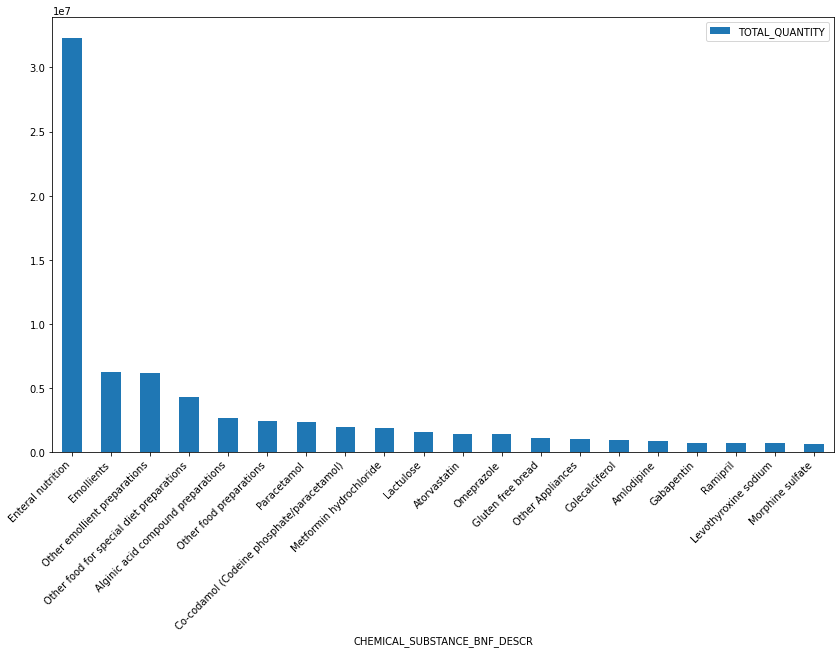

In [32]:
# Separate bar chart for most prescribed drugs 2021

drug_21_main=drug_quantity_top_21.head(20)
drug_21_main.plot.bar(x='CHEMICAL_SUBSTANCE_BNF_DESCR',y='TOTAL_QUANTITY',figsize=(14,8))
plt.xticks(rotation=45, ha='right')
plt.show()

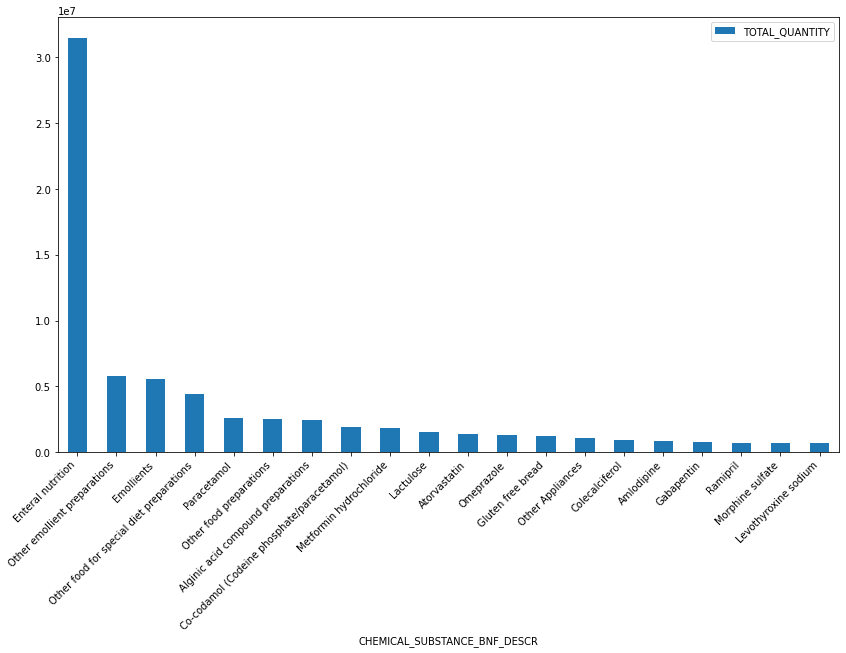

In [33]:
# Separate bar chart for most prescribed drugs 2020

drug_20_main=drug_quantity_top_20.head(20)
drug_20_main.plot.bar(x='CHEMICAL_SUBSTANCE_BNF_DESCR',y='TOTAL_QUANTITY',figsize=(14,8))
plt.xticks(rotation=45, ha='right')
plt.show()

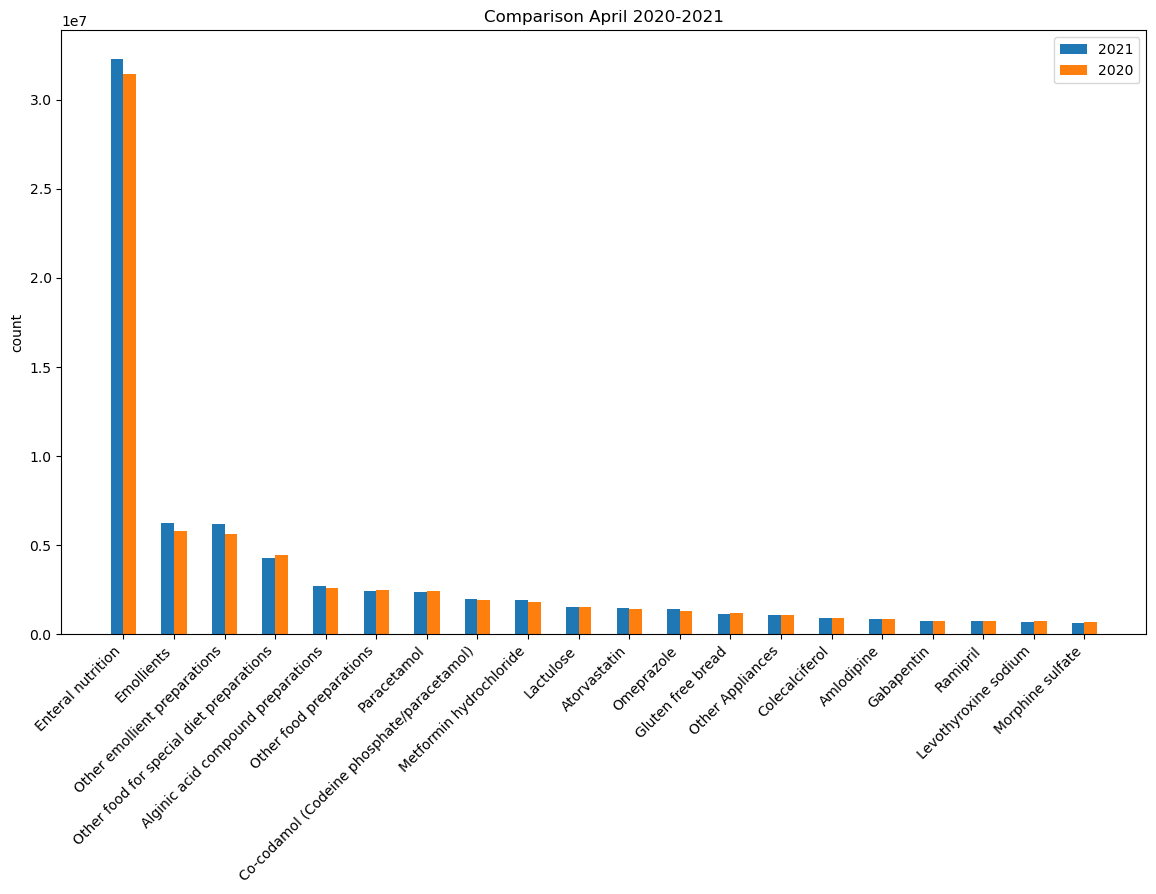

In [34]:
# comparison bar chart between two years - prescriptions

prescriptions_count = len(drug_21_main) 
x = np.arange(prescriptions_count)  # the label locations
width = 0.25  # the width of the bars

_ , ax = plt.subplots()
rects1 = ax.bar(x - width/2, drug_21_main[["TOTAL_QUANTITY"]].values.reshape(prescriptions_count), width, label='2021') ## turn series to list
rects2 = ax.bar(x + width/2, drug_20_main[["TOTAL_QUANTITY"]].values.reshape(prescriptions_count), width, label='2020')

#text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('count')
ax.set_title('Comparison April 2020-2021')
ax.set_xticks(x)

x_axis = pd.Series(drug_21_main[["CHEMICAL_SUBSTANCE_BNF_DESCR"]].values.reshape(prescriptions_count)) 

ax.set_xticklabels(x_axis, rotation=90)

ax.legend()

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(14,8, forward=True)
plt.xticks(rotation=45, ha='right')
fig.set_dpi(100)


In [35]:
## PRESCRIPTIONS BY GROUP (BNF_CHAPTER_PLUS_CODE) ##

# 2021

# METHOD 1 - value_counts - 2021 prescriptions by group

drug_group_21 = epd_21["BNF_CHAPTER_PLUS_CODE"].value_counts()

# 2021 prescriptions - 10 most prescribed GROUPS
group_21_main = drug_group_21.head(10)
group_21_main

04: Central Nervous System                                 56409
02: Cardiovascular System                                  32331
06: Endocrine System                                       21260
01: Gastro-Intestinal System                               16416
09: Nutrition and Blood                                    16260
13: Skin                                                   13853
03: Respiratory System                                     12776
21: Appliances                                             11886
05: Infections                                              8513
07: Obstetrics, Gynaecology and Urinary-Tract Disorders     7630
Name: BNF_CHAPTER_PLUS_CODE, dtype: int64

In [36]:
# METHOD 2 - calculation by TOTAL QUANTITY - 2021 prescriptions by group

drug_group_21 = epd_21[["BNF_CHAPTER_PLUS_CODE","TOTAL_QUANTITY"]]
drug_group_sum_21 = drug_group_21.groupby('BNF_CHAPTER_PLUS_CODE', as_index=False)["TOTAL_QUANTITY"].sum() 

# 2021 prescriptions - 10 most prescribed GROUPS by TOTAL QUANTITY

group_21_sum_main = drug_group_sum_21.head(10)
group_21_sum_main

,BNF_CHAPTER_PLUS_CODE,TOTAL_QUANTITY
0,01: Gastro-Intestinal System,8668543.0
1,02: Cardiovascular System,8566234.0
2,03: Respiratory System,1685408.0
3,04: Central Nervous System,13651930.4
4,05: Infections,1078985.5
5,06: Endocrine System,4724934.0
6,"07: Obstetrics, Gynaecology and Urinary-Tract ...",957917.0
7,08: Malignant Disease and Immunosuppression,101576.0
8,09: Nutrition and Blood,43517231.0
9,10: Musculoskeletal and Joint Diseases,2066979.0


In [37]:
# 2020

# METHOD 1 - value_counts - 2020 prescriptions by group

drug_group_20 = epd_20["BNF_CHAPTER_PLUS_CODE"].value_counts()

#2020 prescriptions - 10 most prescribed GROUPS
group_20_main = drug_group_20.head(10)
group_20_main

04: Central Nervous System                                 54743
02: Cardiovascular System                                  32049
06: Endocrine System                                       20310
01: Gastro-Intestinal System                               15939
09: Nutrition and Blood                                    15866
03: Respiratory System                                     13242
13: Skin                                                   13058
21: Appliances                                             10852
05: Infections                                              8995
07: Obstetrics, Gynaecology and Urinary-Tract Disorders     7405
Name: BNF_CHAPTER_PLUS_CODE, dtype: int64

In [38]:
# METHOD 2 - calculation by TOTAL QUANTITY - 2020 prescriptions by group

drug_group_20 = epd_20[["BNF_CHAPTER_PLUS_CODE","TOTAL_QUANTITY"]]
drug_group_sum_20 = drug_group_20.groupby('BNF_CHAPTER_PLUS_CODE', as_index=False)["TOTAL_QUANTITY"].sum() 
drug_group_sum_20

# 2020 prescriptions - 10 most prescribed GROUPS by TOTAL QUANTITY

group_20_sum_main = drug_group_sum_20.head(10)
group_21_sum_main


,BNF_CHAPTER_PLUS_CODE,TOTAL_QUANTITY
0,01: Gastro-Intestinal System,8668543.0
1,02: Cardiovascular System,8566234.0
2,03: Respiratory System,1685408.0
3,04: Central Nervous System,13651930.4
4,05: Infections,1078985.5
5,06: Endocrine System,4724934.0
6,"07: Obstetrics, Gynaecology and Urinary-Tract ...",957917.0
7,08: Malignant Disease and Immunosuppression,101576.0
8,09: Nutrition and Blood,43517231.0
9,10: Musculoskeletal and Joint Diseases,2066979.0


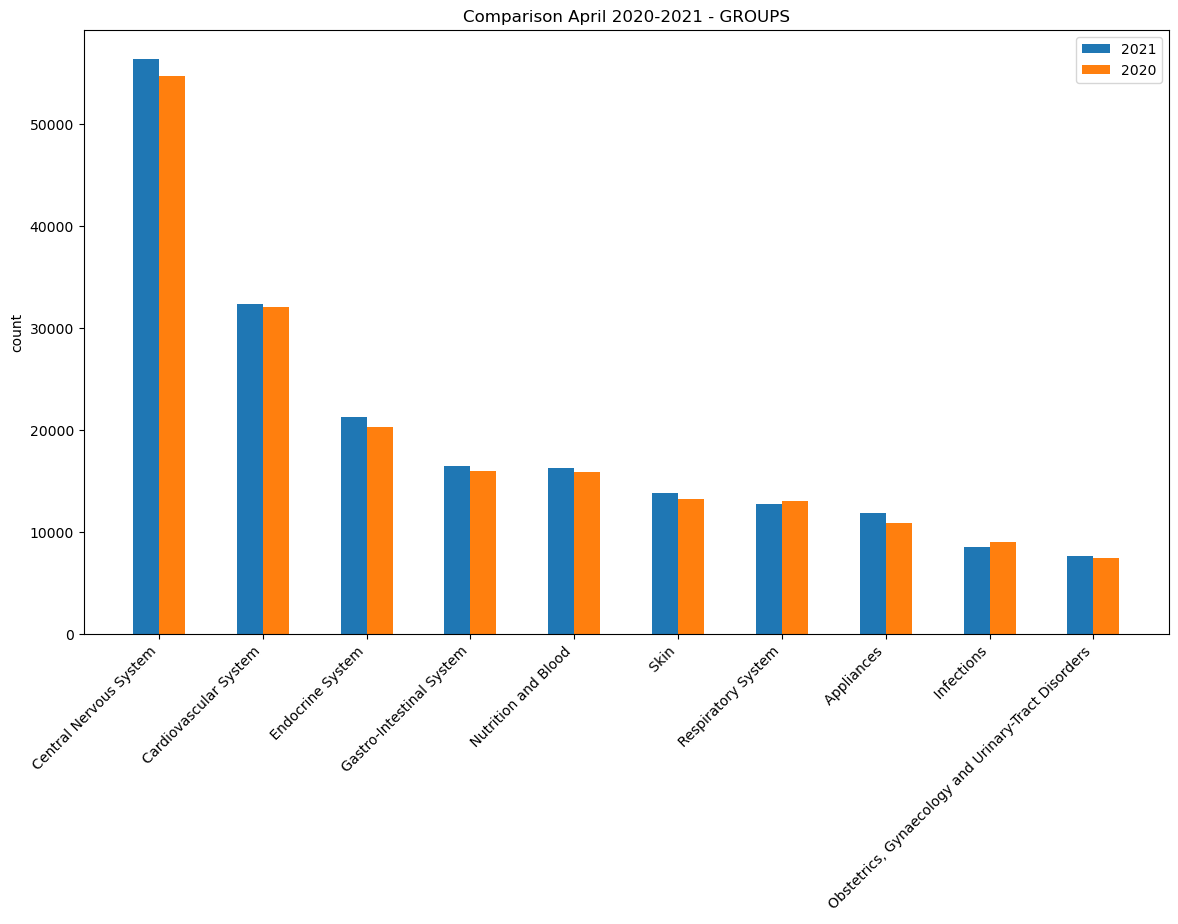

In [39]:
# comparison bar chart between two years

# METHOD 1 - prescriptions as GROUPS - value_counts

x = np.arange(len(group_21_main.keys()))  # the label locations
width = 0.25  # the width of the bars

_ , ax = plt.subplots()
rects1 = ax.bar(x - width/2, group_21_main , width, label='2021')
rects2 = ax.bar(x + width/2, group_20_main , width, label='2020')

# text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('count')
ax.set_title('Comparison April 2020-2021 - GROUPS')
ax.set_xticks(x)

second_word = pd.Series(group_21_main.keys().tolist()) ## turn series to list
second = second_word.str.split(':').str[1] ## get second word from list for the x axis legend

ax.set_xticklabels(second, rotation=90)

ax.legend()

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(14,8, forward=True)
plt.xticks(rotation=45, ha='right')
fig.set_dpi(100)

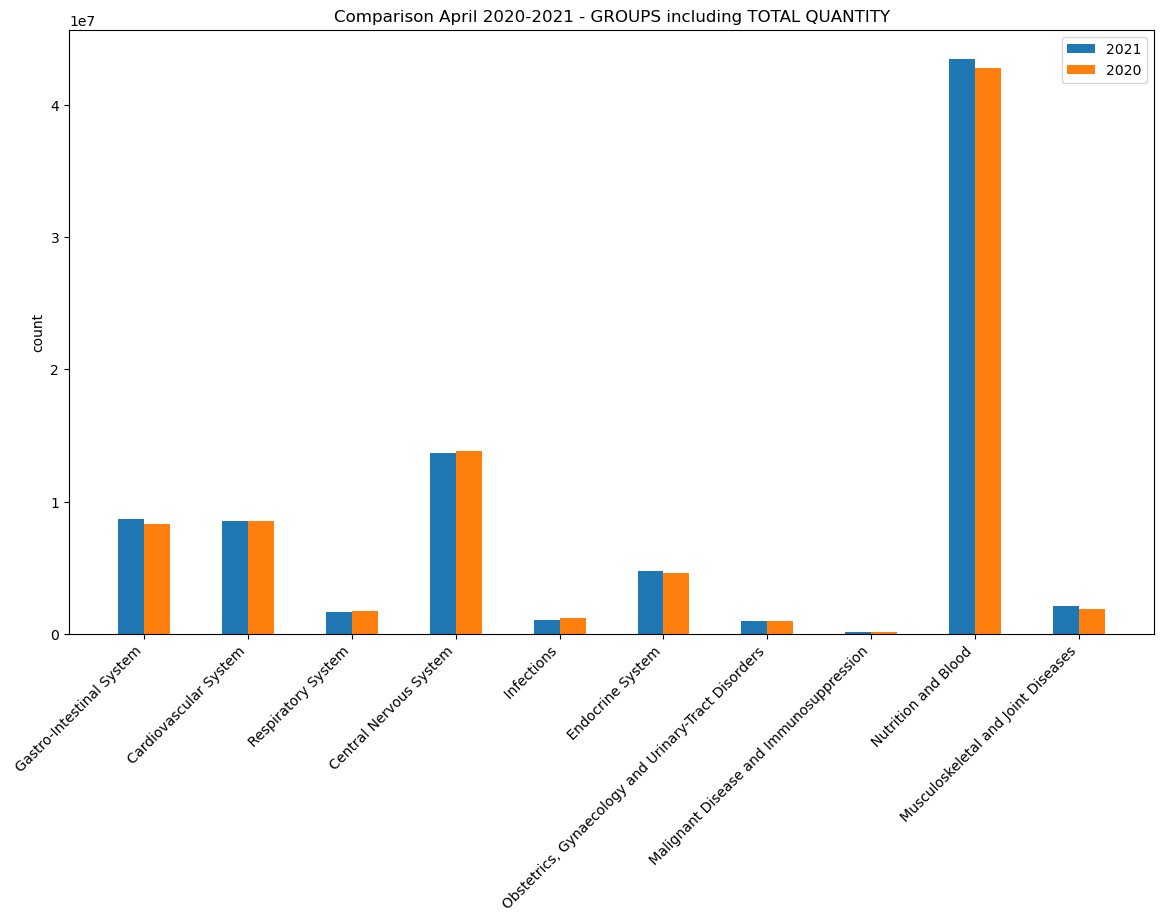

In [40]:
# comparison bar chart between two years

# METHOD 2 - prescriptions as GROUPS including calculation by TOTAL QUANTITY

prescriptions_count = len(group_21_sum_main) 
x = np.arange(prescriptions_count)  # the label locations
width = 0.25  # the width of the bars

#x = np.arange(len(group_21_sum_main.keys()))  # the label locations

_ , ax = plt.subplots()
#rects1 = ax.bar(x - width/2, group_21_sum_main , width, label='2021')
#rects2 = ax.bar(x + width/2, group_20_sum_main , width, label='2020')

rects1 = ax.bar(x - width/2, group_21_sum_main[["TOTAL_QUANTITY"]].values.reshape(prescriptions_count), width, label='2021')
rects2 = ax.bar(x + width/2, group_20_sum_main[["TOTAL_QUANTITY"]].values.reshape(prescriptions_count), width, label='2020')

# text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('count')
ax.set_title('Comparison April 2020-2021 - GROUPS including TOTAL QUANTITY')
ax.set_xticks(x)

second_word = pd.Series(group_21_sum_main[["BNF_CHAPTER_PLUS_CODE"]].values.reshape(prescriptions_count)) 
second = second_word.str.split(':').str[1] ## get second word from list for the x axis legend

ax.set_xticklabels(second, rotation=90)

ax.legend()

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(14,8, forward=True)
plt.xticks(rotation=45, ha='right')
fig.set_dpi(100)

<a id="cost"></a>

### 1.2 COSTS

In [41]:
## COSTS OF PRESCRIPTIONS

# 2021 total cost of presciptions
overall_cost_21 = epd_21['ACTUAL_COST'].sum()
# 2020 total cost of presciptions
overall_cost_20 = epd_20['ACTUAL_COST'].sum()

In [42]:
# 2021 costs by groups 'BNF_CHAPTER_PLUS_CODE'
group_cost_21 = epd_21.groupby('BNF_CHAPTER_PLUS_CODE')['ACTUAL_COST'].sum()
group_cost_main_21=group_cost_21.head(15)
group_cost_main_21

BNF_CHAPTER_PLUS_CODE
01: Gastro-Intestinal System                               5.442799e+05
02: Cardiovascular System                                  1.016092e+06
03: Respiratory System                                     9.344757e+05
04: Central Nervous System                                 1.463184e+06
05: Infections                                             1.731447e+05
06: Endocrine System                                       1.385890e+06
07: Obstetrics, Gynaecology and Urinary-Tract Disorders    1.997738e+05
08: Malignant Disease and Immunosuppression                1.004578e+05
09: Nutrition and Blood                                    7.407016e+05
10: Musculoskeletal and Joint Diseases                     1.442682e+05
11: Eye                                                    1.124161e+05
12: Ear, Nose and Oropharynx                               8.032734e+04
13: Skin                                                   3.354651e+05
14: Immunological Products and Vaccines   

In [43]:
# 2020 costs by groups 'BNF_CHAPTER_PLUS_CODE'
group_cost_20 = epd_20.groupby('BNF_CHAPTER_PLUS_CODE')['ACTUAL_COST'].sum()
group_cost_main_20=group_cost_20.head(15)
group_cost_main_20

BNF_CHAPTER_PLUS_CODE
01: Gastro-Intestinal System                               4.685081e+05
02: Cardiovascular System                                  9.147845e+05
03: Respiratory System                                     9.681891e+05
04: Central Nervous System                                 1.519091e+06
05: Infections                                             1.810821e+05
06: Endocrine System                                       1.313136e+06
07: Obstetrics, Gynaecology and Urinary-Tract Disorders    1.946254e+05
08: Malignant Disease and Immunosuppression                9.472278e+04
09: Nutrition and Blood                                    7.247947e+05
10: Musculoskeletal and Joint Diseases                     1.379402e+05
11: Eye                                                    1.168916e+05
12: Ear, Nose and Oropharynx                               8.076877e+04
13: Skin                                                   3.054986e+05
14: Immunological Products and Vaccines   

In [44]:
#  Statistics to compare the costs between the two years
import scipy.stats as stats

group_cost_both = pd.merge(group_cost_main_21, group_cost_main_20, how="outer", on="BNF_CHAPTER_PLUS_CODE") # combine two df
group_cost_both.rename(columns={"ACTUAL_COST_x": "ACTUAL_COST_21"},inplace=True)
group_cost_both.rename(columns={"ACTUAL_COST_y": "ACTUAL_COST_20"},inplace=True)
group_cost_both

,ACTUAL_COST_21,ACTUAL_COST_20
BNF_CHAPTER_PLUS_CODE,,
01: Gastro-Intestinal System,5.442799e+05,4.685081e+05
02: Cardiovascular System,1.016092e+06,9.147845e+05
03: Respiratory System,9.344757e+05,9.681891e+05
04: Central Nervous System,1.463184e+06,1.519091e+06
05: Infections,1.731447e+05,1.810821e+05
06: Endocrine System,1.385890e+06,1.313136e+06
"07: Obstetrics, Gynaecology and Urinary-Tract Disorders",1.997738e+05,1.946254e+05
08: Malignant Disease and Immunosuppression,1.004578e+05,9.472278e+04
09: Nutrition and Blood,7.407016e+05,7.247947e+05


ShapiroResult(statistic=0.8327164649963379, pvalue=0.009978454560041428)

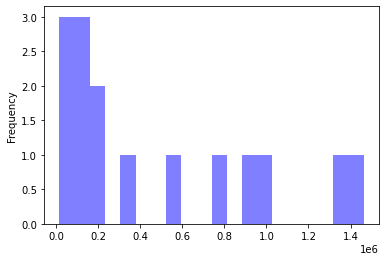

In [45]:
## check distributions:
# 1. histogram 
group_cost_both["ACTUAL_COST_21"].plot.hist(bins=20, facecolor='blue', alpha=0.5)
# 2. shapiro test (tests the null hypothosis that data drawn from normal distrbution, if p<0.05 data not normally distributed)
stats.shapiro(group_cost_both["ACTUAL_COST_21"])


In [47]:
# data not normally distributed --> use non-parametric test -  wilcoxon rank
stats.wilcoxon(group_cost_both['ACTUAL_COST_20'], group_cost_both['ACTUAL_COST_21'])


NameError: name 'stats' is not defined

#### p >0.05 so no evidence of difference in costs of groups


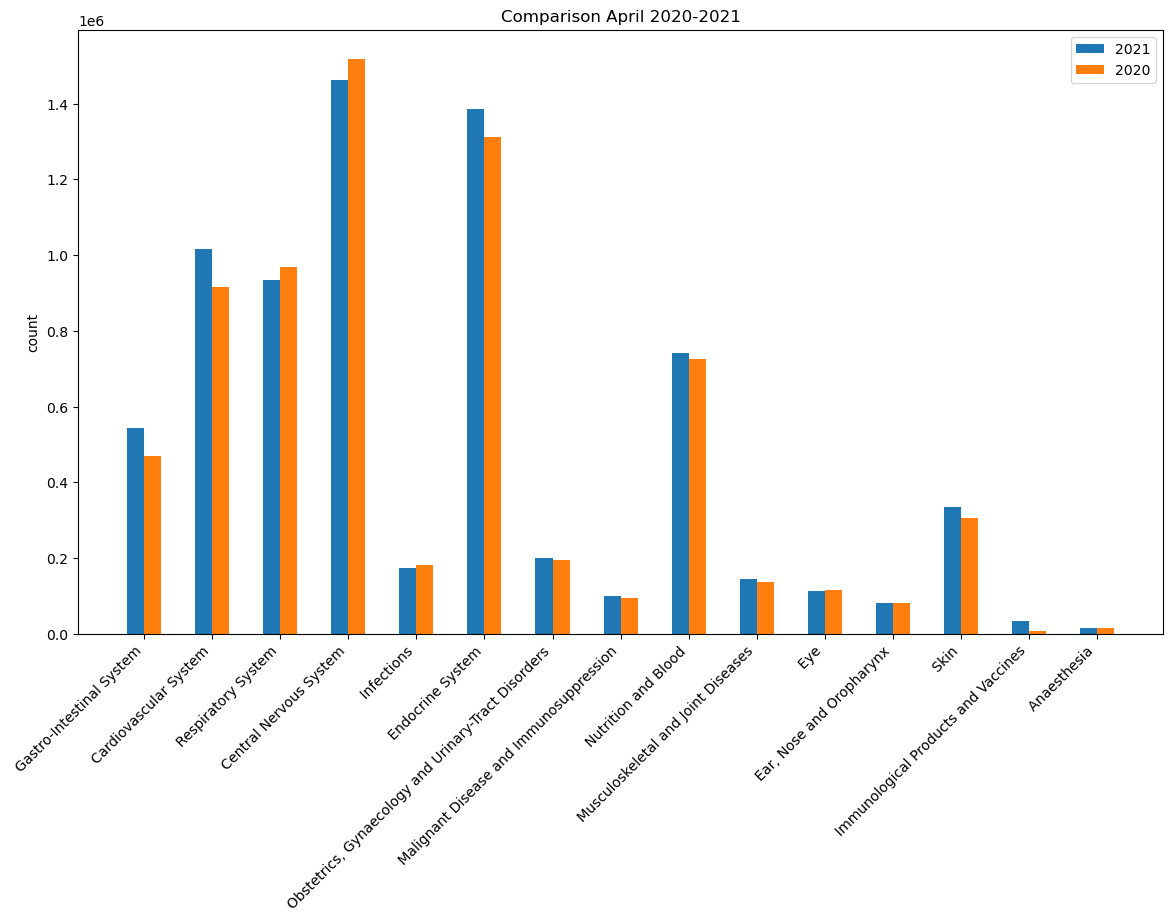

In [47]:
# comparison bar chart between two years - prescription costs of main 15 GROUPS (BNF_CHAPTER_PLUS_COD) BY SUM

x = np.arange(len(group_cost_main_21.keys()))  # the label locations
width = 0.25  # the width of the bars

_ , ax = plt.subplots()
rects1 = ax.bar(x - width/2, group_cost_main_21 , width, label='2021')
rects2 = ax.bar(x + width/2, group_cost_main_20 , width, label='2020')

# text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('count')
ax.set_title('Comparison April 2020-2021')
ax.set_xticks(x,)
             
second_word = pd.Series(group_cost_main_21.keys().tolist()) ## turn series to list
second = second_word.str.split(':').str[1] ## get second word from list for the x axis legend

ax.set_xticklabels(second, rotation=90)
    
ax.legend()

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(14,8, forward=True)
plt.xticks(rotation=45, ha='right')
fig.set_dpi(100)

In [48]:
# different approach - 2021-2020 MEAN costs by groups 'BNF_CHAPTER_PLUS_CODE'
group_mean_cost_21 = epd_21.groupby('BNF_CHAPTER_PLUS_CODE')['ACTUAL_COST'].mean()
group_mean_cost_main_21=group_mean_cost_21.head(15)
group_mean_cost_main_21

group_mean_cost_20 = epd_20.groupby('BNF_CHAPTER_PLUS_CODE')['ACTUAL_COST'].mean()
group_mean_cost_main_20=group_mean_cost_20.head(15)
group_mean_cost_main_20

BNF_CHAPTER_PLUS_CODE
01: Gastro-Intestinal System                               29.393818
02: Cardiovascular System                                  28.543309
03: Respiratory System                                     73.115024
04: Central Nervous System                                 27.749504
05: Infections                                             20.131416
06: Endocrine System                                       64.654654
07: Obstetrics, Gynaecology and Urinary-Tract Disorders    26.282968
08: Malignant Disease and Immunosuppression                70.478257
09: Nutrition and Blood                                    45.682255
10: Musculoskeletal and Joint Diseases                     20.963553
11: Eye                                                    21.869329
12: Ear, Nose and Oropharynx                               28.845989
13: Skin                                                   23.395512
14: Immunological Products and Vaccines                    53.750129
15: Anaesthe

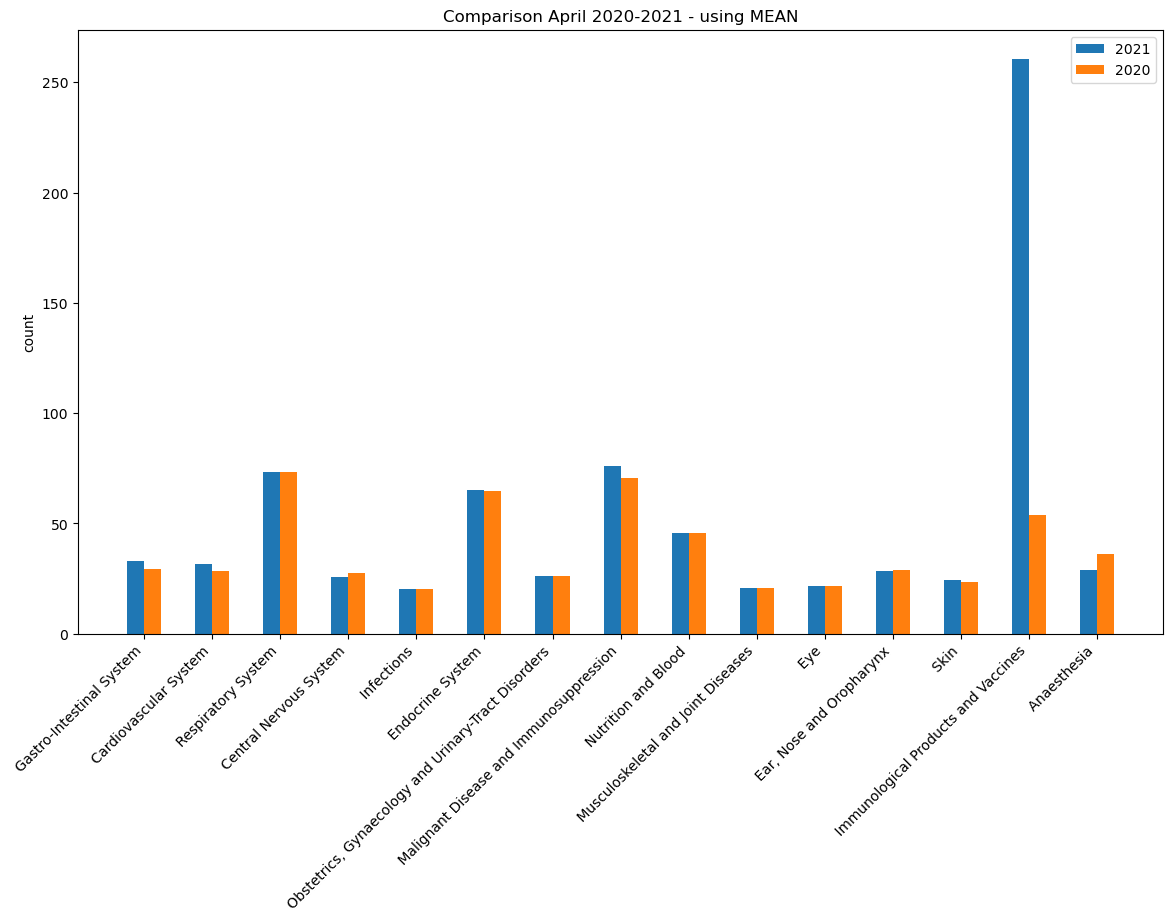

In [49]:
# comparison bar chart between two years - prescription costs of main 15 GROUPS (BNF_CHAPTER_PLUS_COD) - BY MEAN

x = np.arange(len(group_mean_cost_main_21.keys()))  # the label locations
width = 0.25  # the width of the bars

_ , ax = plt.subplots()
rects1 = ax.bar(x - width/2, group_mean_cost_main_21 , width, label='2021')
rects2 = ax.bar(x + width/2, group_mean_cost_main_20 , width, label='2020')

# text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('count')
ax.set_title('Comparison April 2020-2021 - using MEAN')
ax.set_xticks(x,)
             
second_word = pd.Series(group_mean_cost_main_21.keys().tolist()) ## turn series to list
second = second_word.str.split(':').str[1] ## get second word from list for the x axis legend

ax.set_xticklabels(second, rotation=90)
    
ax.legend()

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(14,8, forward=True)
plt.xticks(rotation=45, ha='right')
fig.set_dpi(100)

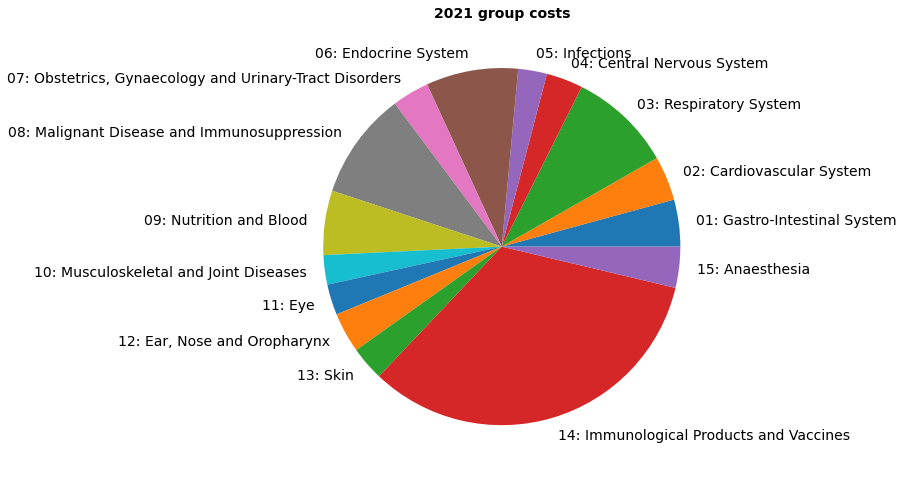

In [50]:
# Pie chart for 2021 group costs

plot = group_mean_cost_main_21.plot.pie(y='ACTUAL_COST', figsize=(8,10), legend=None, fontsize=14, rotatelabels=False)
plt.title('2021 group costs', weight='bold', size=14)
plt.ylabel("")
plt.show()

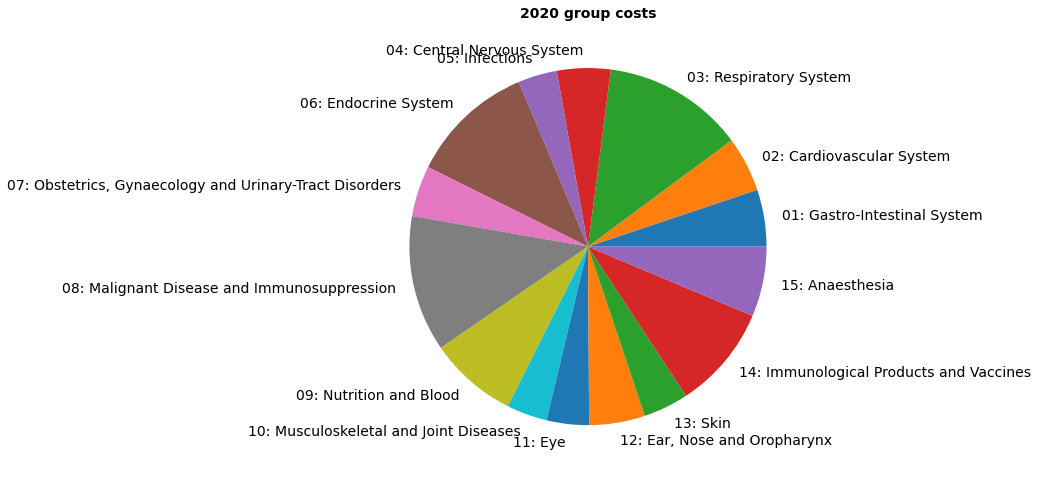

In [51]:
# Pie chart for 2020 group costs

plot = group_mean_cost_main_20.plot.pie(y='ACTUAL_COST', figsize=(8,10), legend=None, fontsize=14, rotatelabels=False)
plt.title('2020 group costs', weight='bold', size=14)
plt.ylabel("")
plt.show()

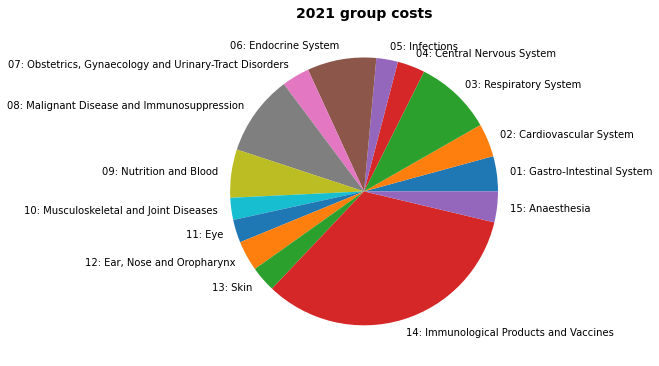

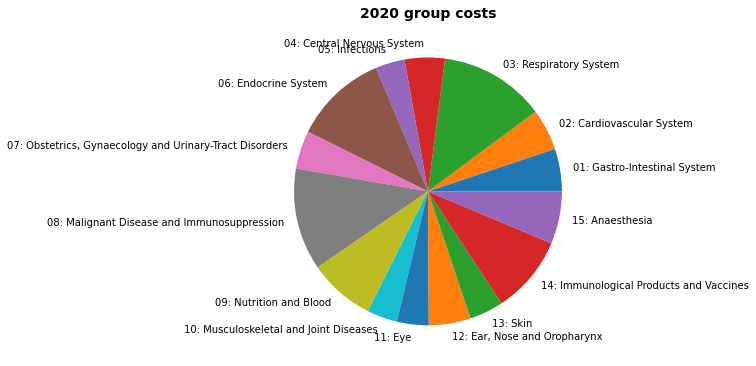

In [52]:
#Combined pie charts

plt.figure(0)
# Create first chart here.
plot = group_mean_cost_main_21.plot.pie(y='ACTUAL_COST', figsize=(6,8), legend=None, fontsize=10, rotatelabels=False)
plt.title('2021 group costs', weight='bold', size=14)
plt.ylabel("")

plt.figure(1)
# Create second chart here.
plot = group_mean_cost_main_20.plot.pie(y='ACTUAL_COST', figsize=(6,8), legend=None, fontsize=10, rotatelabels=False)
plt.title('2020 group costs', weight='bold', size=14)
plt.ylabel("")

plt.show() #show all figures

In [53]:

# trying to analyze the difference in cost in "14: Immunological Products and Vaccines" - using sum of ACTUAL_COST calculation


In [54]:
# 2021 vaccines SUM costs

vaccines_21 = epd_21.loc[epd_21["BNF_CHAPTER_PLUS_CODE"] == '14: Immunological Products and Vaccines']
vaccines_cost_21=vaccines_21[["CHEMICAL_SUBSTANCE_BNF_DESCR","ACTUAL_COST"]]
vaccines_cost_sum_21 = vaccines_cost_21.groupby('CHEMICAL_SUBSTANCE_BNF_DESCR', as_index=False)["ACTUAL_COST"].sum()

# 2021 vaccines - 20 highest cost 
vaccines_cost_top_21=vaccines_cost_sum_21.sort_values(by=['ACTUAL_COST'],ascending=False)
vaccines_cost_top_21.head(20)


,CHEMICAL_SUBSTANCE_BNF_DESCR,ACTUAL_COST
6,Influenza,27897.14378
8,Pneumococcal,2405.75182
4,Hepatitis B,1397.28130
5,"Human papillomavirus (Type 6,11,16,18)",886.24367
9,Shingles (H/Z),372.44273
1,Hepatitis A,312.55575
2,Hepatitis A/hepatitis B,217.19723
7,Meningococcal A + C + W135 + Y vaccine,111.77009
0,Diphtheria,108.98827
10,Typhoid,93.55157


In [55]:
# 2020 vaccines SUM costs

vaccines_20 = epd_20.loc[epd_20["BNF_CHAPTER_PLUS_CODE"] == '14: Immunological Products and Vaccines']
vaccines_cost_20=vaccines_20[["CHEMICAL_SUBSTANCE_BNF_DESCR","ACTUAL_COST"]]
vaccines_cost_sum_20 = vaccines_cost_20.groupby('CHEMICAL_SUBSTANCE_BNF_DESCR', as_index=False)["ACTUAL_COST"].sum()

# 2020 vaccines - 20 highest cost
vaccines_cost_top_20=vaccines_cost_sum_20.sort_values(by=['ACTUAL_COST'],ascending=False)
vaccines_cost_top_20.head(20)


,CHEMICAL_SUBSTANCE_BNF_DESCR,ACTUAL_COST
5,Influenza,1698.85673
8,Pneumococcal,1657.93970
1,Hepatitis A,1258.05847
3,Hepatitis A/typhoid vaccine,831.04589
9,Typhoid,684.69258
4,Hepatitis B,684.06972
0,Diphtheria,260.43781
2,Hepatitis A/hepatitis B,38.65200
7,Meningococcal A + C + W135 + Y vaccine,27.88745
6,"Measles, mumps and rubella vaccine",7.12680


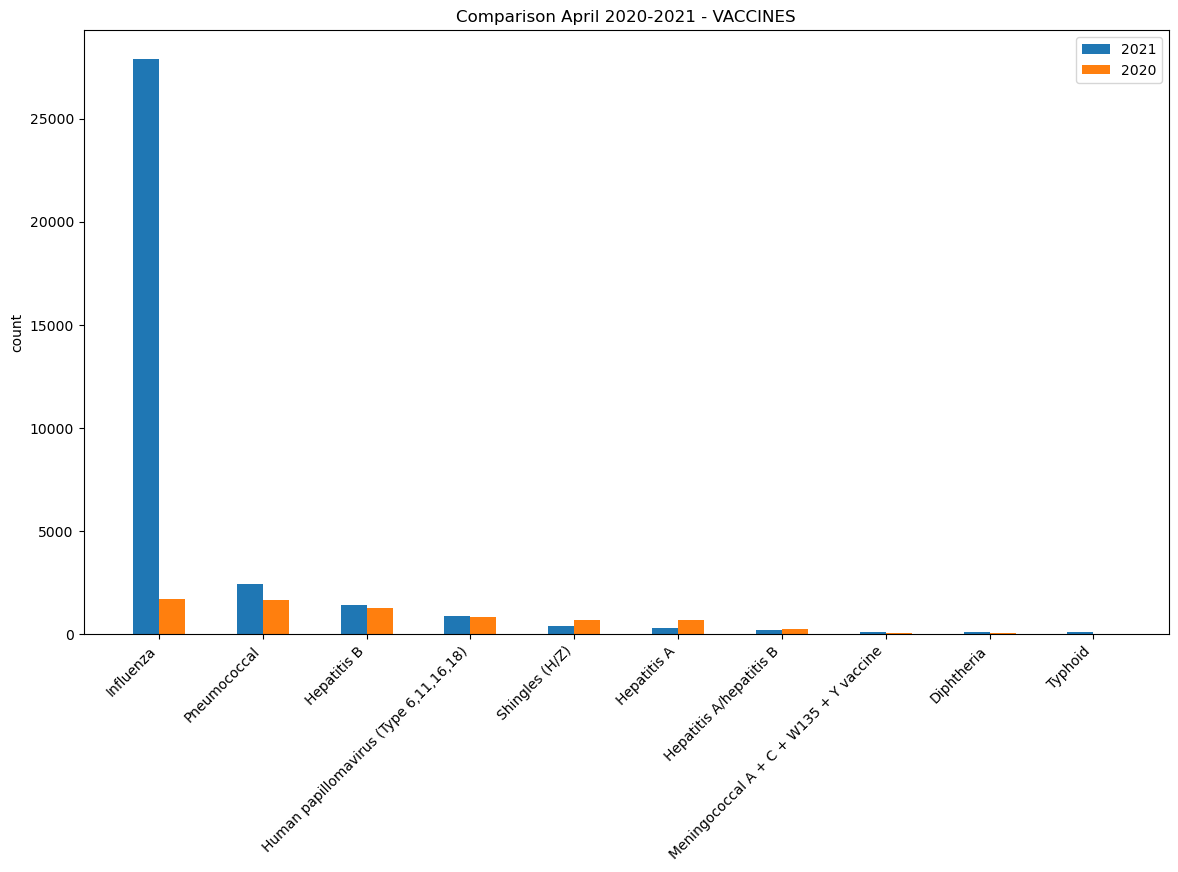

In [56]:
# comparison bar chart between two years - VACCINES COSTS

vaccines_21_main = vaccines_cost_top_21.head(10)
vaccines_20_main = vaccines_cost_top_20.head(10)

vaccines_count = len(vaccines_21_main)
x = np.arange(vaccines_count)  # the label locations
width = 0.25  # the width of the bars

_ , ax = plt.subplots()
rects1 = ax.bar(x - width/2, vaccines_21_main[["ACTUAL_COST"]].values.reshape(vaccines_count), width, label='2021')
rects2 = ax.bar(x + width/2, vaccines_20_main[["ACTUAL_COST"]].values.reshape(vaccines_count), width, label='2020')

# text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('count')
ax.set_title('Comparison April 2020-2021 - VACCINES')
ax.set_xticks(x)

#second_word = pd.Series(group_21_sum_main[["BNF_CHAPTER_PLUS_CODE"]].values.reshape(prescriptions_count)) 
#second = second_word.str.split(':').str[1] ## get second word from list for the x axis legend

#x_axis = pd.Series(group_cost_main_21.keys().tolist())
#values.reshape(prescriptions_count)) 
x_axis= pd.Series(vaccines_21_main[["CHEMICAL_SUBSTANCE_BNF_DESCR"]].values.reshape(vaccines_count)) 
ax.set_xticklabels(x_axis, rotation=90)

ax.legend()

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(14,8, forward=True)
plt.xticks(rotation=45, ha='right')
fig.set_dpi(100)


<Figure size 432x288 with 0 Axes>

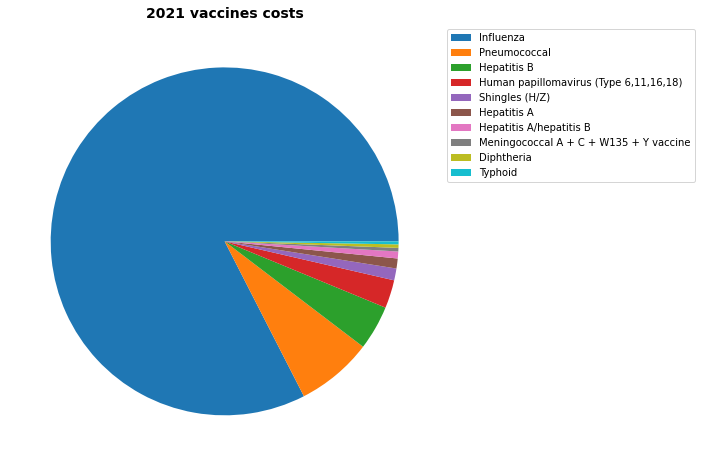

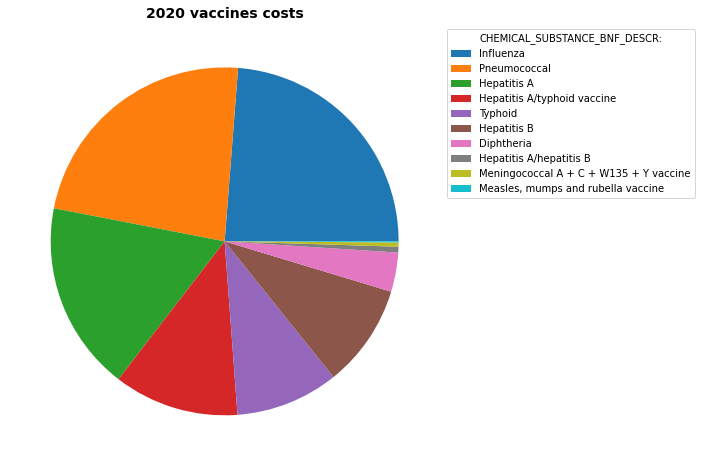

In [57]:
plt.figure(0)
# Create first chart here.
plot = vaccines_21_main.plot.pie(
    y='ACTUAL_COST',
    labels = None,
    figsize=(8,8),
    fontsize=10,
    rotatelabels=False)
plt.title('2021 vaccines costs', weight='bold', size=14)
plt.legend(vaccines_21_main[["CHEMICAL_SUBSTANCE_BNF_DESCR"]].values.reshape(vaccines_count),bbox_to_anchor=(1,1))
plt.ylabel("")

plt.figure(1)
# Create second chart here.
plot = vaccines_20_main.plot.pie(
    y='ACTUAL_COST',
    labels=None,
    figsize=(8,8),
    legend=None,
    fontsize=10,
    rotatelabels=False)
plt.title('2020 vaccines costs', weight='bold', size=14)
plt.ylabel("")
plt.legend(vaccines_20_main[["CHEMICAL_SUBSTANCE_BNF_DESCR"]].values.reshape(vaccines_count), title = "CHEMICAL_SUBSTANCE_BNF_DESCR:",bbox_to_anchor=(1,1))

plt.show() #show all figures

In [58]:
#  Statistics to compare the vaccines costs between the two years

vaccines_cost_both = pd.merge(vaccines_21_main, vaccines_20_main, how="outer", on="CHEMICAL_SUBSTANCE_BNF_DESCR")
vaccines_cost_both.rename(columns={"ACTUAL_COST_x": "ACTUAL_COST_21"},inplace=True)
vaccines_cost_both.rename(columns={"ACTUAL_COST_y": "ACTUAL_COST_20"},inplace=True)
vaccines_cost_both

,CHEMICAL_SUBSTANCE_BNF_DESCR,ACTUAL_COST_21,ACTUAL_COST_20
0,Influenza,27897.14378,1698.85673
1,Pneumococcal,2405.75182,1657.93970
2,Hepatitis B,1397.28130,684.06972
3,"Human papillomavirus (Type 6,11,16,18)",886.24367,NaN
4,Shingles (H/Z),372.44273,NaN
5,Hepatitis A,312.55575,1258.05847
6,Hepatitis A/hepatitis B,217.19723,38.65200
7,Meningococcal A + C + W135 + Y vaccine,111.77009,27.88745
8,Diphtheria,108.98827,260.43781
9,Typhoid,93.55157,684.69258


In [59]:
vaccines_cost_both.dropna(inplace=True) # dropping NAN values for statistical tests
vaccines_cost_both

,CHEMICAL_SUBSTANCE_BNF_DESCR,ACTUAL_COST_21,ACTUAL_COST_20
0,Influenza,27897.14378,1698.85673
1,Pneumococcal,2405.75182,1657.93970
2,Hepatitis B,1397.28130,684.06972
5,Hepatitis A,312.55575,1258.05847
6,Hepatitis A/hepatitis B,217.19723,38.65200
7,Meningococcal A + C + W135 + Y vaccine,111.77009,27.88745
8,Diphtheria,108.98827,260.43781
9,Typhoid,93.55157,684.69258


ShapiroResult(statistic=0.8880471587181091, pvalue=0.22441373765468597)

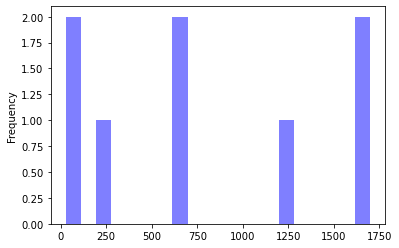

In [60]:
## check distributions:
# 1. histogram 
vaccines_cost_both["ACTUAL_COST_20"].plot.hist(bins=20, facecolor='blue', alpha=0.5)
# 2. shapiro test (tests the null hypothosis that data drawn from normal distrbution, if p<0.05 data not normally distributed)
stats.shapiro(vaccines_cost_both["ACTUAL_COST_20"])

In [61]:
# although p>0.05 in shapiro test, it is not clear that data is normally distributed --> use non-parametric wilcoxon rank
stats.wilcoxon(vaccines_cost_both['ACTUAL_COST_20'], vaccines_cost_both['ACTUAL_COST_21'])

WilcoxonResult(statistic=13.0, pvalue=0.546875)

#### p >0.05  -  no evidence of difference in group of vaccines costs

<a id="geographical"></a>

## PART 2 - GEOGRAPHICAL DATA

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


practices = epd_20["PRACTICE_NAME"]
practices.describe()
GP_practices_20 = len(practices.unique())


In [3]:
practices21 = epd_21["PRACTICE_NAME"]
practices21.describe()
GP_practices_21 = len(practices21.unique())


In [4]:
Practices_dataframe = pd.DataFrame(
    {
        "Month": [
            "April",
            "April",
        ],
        "Year": [2020, 2021],
        "Number of Practices": [GP_practices_20, GP_practices_21],
    }
)

In [5]:
Practices_dataframe

,Month,Year,Number of Practices
0,April,2020,114
1,April,2021,116


Text(0.5, 1.0, 'GP practices per year')

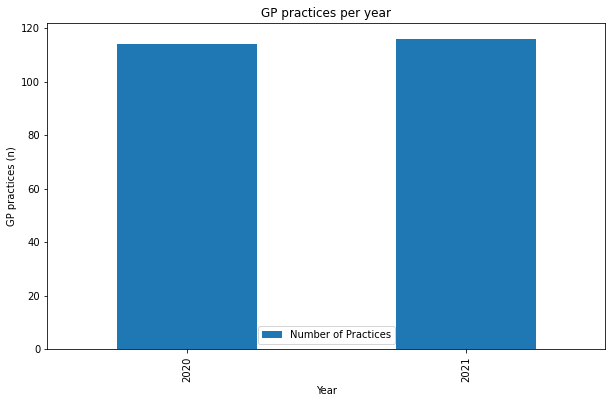

In [6]:
fig, axs = plt.subplots(figsize=(10, 6))        
Practices_dataframe.plot.bar(ax=axs, x="Year", y="Number of Practices")            
axs.set_ylabel("GP practices (n)")  
axs.set_xlabel("Year")             
axs.set_title ("GP practices per year") 
   

In [7]:
difference_in_practices = GP_practices_21 - GP_practices_20
print(f"There are {difference_in_practices} more GP practices in April 2021 compared to April 2020")
print(f"This corresponds to the {(100 - (GP_practices_20 / GP_practices_21) * 100)}%")

There are 2 more GP practices in April 2021 compared to April 2020
This corresponds to the 1.724137931034491%


In [8]:
prescriptions_20 = epd_20["BNF_DESCRIPTION"]
prescriptions_21 = epd_21["BNF_DESCRIPTION"]

#print(prescriptions_20.describe())
#print(prescriptions_20.count())
prescr_20_count = prescriptions_20.count()
prescr_20_unique = len(prescriptions_20.unique())

print(prescriptions_21.describe())
prescr_21_count = prescriptions_21.count()
prescr_21_unique = len(prescriptions_21.unique())

count                        221428
unique                         7576
top       Paracetamol 500mg tablets
freq                           1063
Name: BNF_DESCRIPTION, dtype: object


,Year,Number of Practices,Number of Prescriptions,Unique Prescriptions
0,2020,114,216319,7625
1,2021,116,221428,7576


<AxesSubplot:xlabel='Year'>

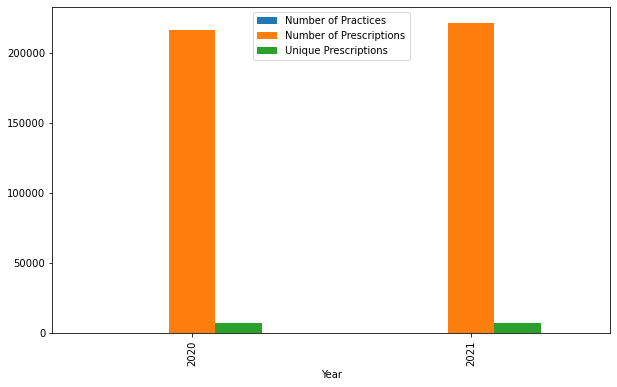

In [9]:
prescriptions_dataframe = pd.DataFrame(
    {
        "Year": [
            "2020",
            "2021",
        ],
        "Number of Practices": [GP_practices_20, GP_practices_21],
        "Number of Prescriptions": [prescr_20_count, prescr_21_count],
        "Unique Prescriptions": [prescr_20_unique, prescr_21_unique]
    }
)
display(prescriptions_dataframe)

fig, axs = plt.subplots(figsize=(10, 6))        
prescriptions_dataframe.plot.bar(ax=axs, x="Year")            

In [10]:
difference_in_prescriptions = prescr_21_count - prescr_20_count
difference_in_unique_prescriptions = prescr_21_unique - prescr_20_unique
Average_total = (100 - (prescr_20_count / prescr_21_count) * 100)
Average_unique = (100 - (prescr_20_unique / prescr_21_unique) * 100)
print(f"There were {difference_in_prescriptions} more prescriptions done in April 2021 compared to April 2020")
print(f"This corresponds to an increase of {Average_total}% of total prescriptions made in 2021 comapred to 2020")
print(f"This shows a reduction by {Average_unique}% of unique prescriptions made in 2021 compared to 2020")

There were 5109 more prescriptions done in April 2021 compared to April 2020
This corresponds to an increase of 2.3072962768936236% of total prescriptions made in 2021 comapred to 2020
This shows a reduction by -0.6467793030622886% of unique prescriptions made in 2021 compared to 2020


# REGIONS

The different areas (ADDRESS_3) where grouped according to their geographical region in 8 different groups: Central, North, East, West, NE, NW, SE, SW. Number of practices, of prescriptions made and of actual costs were compared among regions and years. This was plotted first in seperate bar graphs per year and finally in a joint graph comparing the information between the two periods of time that are being analised.

In [11]:
Regions_Practices= epd_20[["ADDRESS_3", "PRACTICE_NAME"]]
Regions_Practices.describe()

,ADDRESS_3,PRACTICE_NAME
count,215625,216319
unique,24,114
top,MANCHESTER,BENCHILL MEDICAL PRACTICE
freq,132188,3981


In [12]:
Regions_central = epd_20[epd_20["ADDRESS_3"] == "MANCHESTER"]
#print(Regions_central.describe())
#CENTRAL = 132188
CENTRAL = Regions_central["BNF_DESCRIPTION"].count()
print(f"The practices in the Central region made {CENTRAL} total prescriptions in April 2020")

The practices in the Central region made 132188 total prescriptions in April 2020


In [13]:
Regions_north = epd_20[(epd_20["ADDRESS_3"] == 
                                      "CRUMPSALL") | (epd_20["ADDRESS_3"] 
                                                      == "CHEETHAM") | (epd_20["ADDRESS_3"] 
                                                                        == "CHEETHAM HILL")]
Regions_north.describe()
NORTH = Regions_north["BNF_DESCRIPTION"].count()
#NORTH = 8175
print(f"The practices in the Northern region made {NORTH} total prescriptions in April 2020")

The practices in the Northern region made 8175 total prescriptions in April 2020


In [14]:
Regions_west = epd_20[(epd_20["ADDRESS_3"] == "ST HELENS")]
Regions_west.describe()
WEST = Regions_west["BNF_DESCRIPTION"].count()
#WEST = 3
print(f"The practices in the Western region made {WEST} total prescriptions in April 2020")

The practices in the Western region made 3 total prescriptions in April 2020


In [15]:
Regions_SW = epd_20[(epd_20["ADDRESS_3"] == "SALE")| (epd_20["ADDRESS_3"] == "CHORLTON-CUM-HARDY")]
Regions_SW.describe()
SW = Regions_SW["BNF_DESCRIPTION"].count()
#SW = 7066
print(f"The practices in the South West region made {SW} total prescriptions in April 2020")

The practices in the South West region made 7066 total prescriptions in April 2020


In [16]:
Regions_south = epd_20[epd_20["ADDRESS_3"].isin (["HULME, MANCHESTER", "WALMER STREET,RUSHOLME", 
                                                               "WHALLEY RANGE", "WHALLEY RANGE,MANCHESTER", 
                                                               "NORTHENDEN", "NORTHERN MOOR", "BAGULEY",
                                                                "WITHINGTON",
                                                                "WYTHENSHAWE"])]
Regions_south.describe()
SOUTH = Regions_south["BNF_DESCRIPTION"].count()
#SOUTH = 32644
print(f"The practices in the South region made {SOUTH} total prescriptions in April 2020")

The practices in the South region made 32644 total prescriptions in April 2020


In [17]:
Regions_SE = epd_20[epd_20["ADDRESS_3"].isin (["VICTORIA PARK", "FALLOWFIELD", 
                                                               "LONGSIGHT", "LEVENSHULME" 
                                                               ])]
Regions_SE.describe()
SE = Regions_SE["BNF_DESCRIPTION"].count()
#SE = 20533
print(f"The practices in the South East region made {SE} total prescriptions in April 2020")

The practices in the South East region made 20533 total prescriptions in April 2020


In [18]:
Regions_NE = epd_20[epd_20["ADDRESS_3"].isin (["BLACKLEY", "COLLYHURST", 
                                                               "NEW MOSTON,MANCHESTER", "NEWTON HEATH" 
                                                               ])]
Regions_NE.describe()
NE = Regions_NE["BNF_DESCRIPTION"].count()
#NE = 9263
print(f"The practices in the North East region made {NE} total prescriptions in April 2020")

The practices in the North East region made 9263 total prescriptions in April 2020


In [19]:
regions_dataframe_20 = pd.DataFrame(
    {
        "Regions": [
            "CENTRAL",
            "NORTH",
            "NE",
            "WEST",
            "SW",
            "SOUTH",
            "SE",
            ],
        "Number of Prescriptions": [CENTRAL, NORTH, NE, WEST, SW, SOUTH, SE]
    }
)

regions_dataframe_20

,Regions,Number of Prescriptions
0,CENTRAL,132188
1,NORTH,8175
2,NE,9263
3,WEST,3
4,SW,7066
5,SOUTH,32644
6,SE,20533


Text(0.5, 1.0, 'Total number of prescriptions done per region, April 2020')

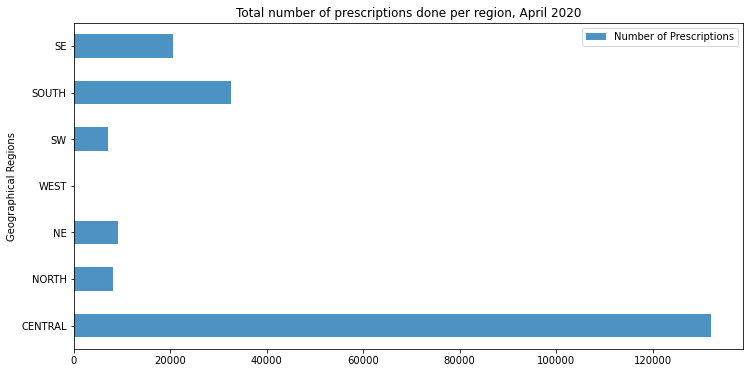

In [20]:
#How to plot and customize a horitzontal bar graph

fig, axs = plt.subplots(figsize=(12, 6))  
regions_dataframe_20.plot.barh(ax=axs, x="Regions", y="Number of Prescriptions", alpha=0.8)           
axs.set_ylabel("Geographical Regions")            
axs.set_title ("Total number of prescriptions done per region, April 2020") 
#fig.savefig("num_prescriptions20.png")

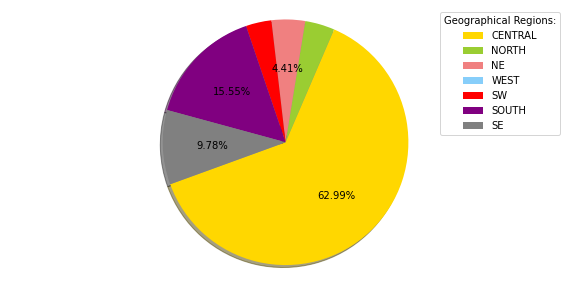

In [21]:
#HOW TO PLOT A PIE CHART


def autopct_generator(limit):
    """Remove percent on small slices."""
    def inner_autopct(pct):
        return ('%.2f%%' % pct) if pct > limit else ''
    return inner_autopct

labels = "CENTRAL", "NORTH", "NE", "WEST", "SW", "SOUTH", "SE"
#sizes = [132188, 8175, 9263, 3, 7066, 32644, 20533]
sizes = [CENTRAL, NORTH, NE, WEST, SW, SOUTH, SE]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'red', 'purple', 'grey']
explode = (0, 0, 0, 0, 0, 0, 0)  # explode no slice

fig1, ax1 = plt.subplots(figsize=(10, 5)) #changes size of the pie chart

# Plot
plt.pie(sizes, explode=explode, colors=colors,
autopct=autopct_generator(4), shadow=True, startangle=200)
plt.legend(labels, title = "Geographical Regions:") #puts the labels as legend instead of around the chart
#fig1, ax1 = plt.subplots(figsize=(6, 5)
plt.axis('equal')
plt.show()

In [24]:
##SELECTION STATEMENT

ADDRESS_3 = str(input("Where do you live?"))

if ADDRESS_3 == "MANCHESTER":
    print("This belongs to Central region")
elif ADDRESS_3 == "CRUMPSALL" or ADDRESS_3 == "CHEETHAM" or ADDRESS_3 == "CHEETHAM HILL":
    print("This belongs to North region")
elif ADDRESS_3 == "ST HELENS":
    print("This belongs to West region")
elif ADDRESS_3 == "SALE" or ADDRESS_3 == "CHORLTON-CUM-HARDY":
    print("This belongs to SW region")
elif ADDRESS_3 == "VICTORIA PARK" or ADDRESS_3 == "FALLOWFIELD" or ADDRESS_3 == "LONGSIGHT" or ADDRESS_3 == "LEVENSHULME":
    print("This belongs to SE region")
elif ADDRESS_3 == "BLACKLEY" or ADDRESS_3 == "COLLYHURST" or ADDRESS_3 == "NEW MOSTON,MANCHESTER" or ADDRESS_3 == "NEWTON HEATH":
    print("This belongs to NE region")
elif ADDRESS_3 == "HULME, MANCHESTER" or ADDRESS_3 == "WALMER STREET,RUSHOLME" or ADDRESS_3 == "WHALLEY RANGE"or ADDRESS_3 == "WHALLEY RANGE,MANCHESTER" or ADDRESS_3 == "NORTHENDEN" or ADDRESS_3 == "NORTHERN MOOR" or ADDRESS_3 == "BAGULEY" or ADDRESS_3 == "WITHINGTON" or ADDRESS_3 == "WYTHENSHAWE":
    print("This belongs to South region")
else:
    print("You've entered an invalid name")

Where do you live?BLACKLEY
This belongs to NE region


In [22]:
#GEOGRAPHICAL REGIONS 2021


Regions_central21 = epd_21[epd_21["ADDRESS_3"] == "MANCHESTER"]
Regions_central21.describe()
CENTRAL21 = Regions_central21["BNF_DESCRIPTION"].count()
#CENTRAL21 = 135716

Regions_north21 = epd_21[(epd_21["ADDRESS_3"] == "CRUMPSALL") | 
                                       (epd_20["ADDRESS_3"] == "CHEETHAM") | 
                                       (epd_20["ADDRESS_3"] == "CHEETHAM HILL")]
Regions_north21.describe()
NORTH21 = Regions_north21["BNF_DESCRIPTION"].count()
#NORTH21 = 8058

Regions_west21 = epd_21[epd_21["ADDRESS_3"].isin (["LEIGH", "WINWICK"])]
Regions_west21.describe()
WEST21 = Regions_west21["BNF_DESCRIPTION"].count()
#WEST21 = 135

Regions_SW21 = epd_21[(epd_21["ADDRESS_3"] == "SALE")| (epd_20["ADDRESS_3"] == 
                                                                      "CHORLTON-CUM-HARDY") | 
                                   (epd_20["ADDRESS_3"] == "PRESCOT")]
Regions_SW21.describe()
SW21 = Regions_SW21["BNF_DESCRIPTION"].count()
#SW21 = 7051

Regions_south21 = epd_21[epd_21["ADDRESS_3"].isin (["HULME, MANCHESTER", "WALMER STREET,RUSHOLME", 
                                                               "WHALLEY RANGE", "WHALLEY RANGE,MANCHESTER", 
                                                               "NORTHENDEN", "NORTHERN MOOR", "BAGULEY", 
                                                                  "WITHINGTON",
                                                                "WYTHENSHAWE"])]
Regions_south21.describe()
SOUTH21 = Regions_south21["BNF_DESCRIPTION"].count()
#SOUTH21 = 32743

Regions_SE21 = epd_21[epd_21["ADDRESS_3"].isin (["VICTORIA PARK", "FALLOWFIELD", 
                                                               "LONGSIGHT", "LEVENSHULME" 
                                                               ])]
Regions_SE21.describe()
SE21 = Regions_SE21["BNF_DESCRIPTION"].count()
#SE21 = 21390

Regions_NE21 = epd_21[epd_21["ADDRESS_3"].isin (["BLACKLEY", "COLLYHURST", 
                                                               "NEW MOSTON,MANCHESTER", "NEWTON HEATH" 
                                                               ])]
Regions_NE21.describe()
NE21 = Regions_NE21["BNF_DESCRIPTION"].count()
#NE21 = 9402

Regions_NW21 = epd_21[(epd_21["ADDRESS_3"] == "WIGAN")]
Regions_NW21.describe()
NW21 = Regions_NW21["BNF_DESCRIPTION"].count()
#NW21 = 202

In [23]:
print(f"The practices in the Central region made {CENTRAL21} total prescriptions in April 2021")
print(f"The practices in the Northern region made {NORTH21} total prescriptions in April 2021")
print(f"The practices in the North East region made {NE21} total prescriptions in April 2021")
print(f"The practices in the Western region made {WEST21} total prescriptions in April 2021")
print(f"The practices in the South West region made {SW21} total prescriptions in April 2021")
print(f"The practices in the South region made {SOUTH21} total prescriptions in April 2021")
print(f"The practices in the South East region made {SE21} total prescriptions in April 2021")
print(f"The practices in the North West region made {NW21} total prescriptions in April 2021")


The practices in the Central region made 135716 total prescriptions in April 2021
The practices in the Northern region made 8058 total prescriptions in April 2021
The practices in the North East region made 9402 total prescriptions in April 2021
The practices in the Western region made 135 total prescriptions in April 2021
The practices in the South West region made 7051 total prescriptions in April 2021
The practices in the South region made 32743 total prescriptions in April 2021
The practices in the South East region made 21390 total prescriptions in April 2021
The practices in the North West region made 202 total prescriptions in April 2021


In [24]:
regions_dataframe_21 = pd.DataFrame(
    {
        "Regions": [
            "CENTRAL21",
            "NORTH21",
            "NE21",
            "WEST21",
            "SW21",
            "SOUTH21",
            "SE21",
            "NW21",
            ],
        "Number of Prescriptions": [CENTRAL21, NORTH21, NE21, WEST21, SW21, SOUTH21, SE21, NW21]
    }
)

regions_dataframe_21

,Regions,Number of Prescriptions
0,CENTRAL21,135716
1,NORTH21,8058
2,NE21,9402
3,WEST21,135
4,SW21,7051
5,SOUTH21,32743
6,SE21,21390
7,NW21,202


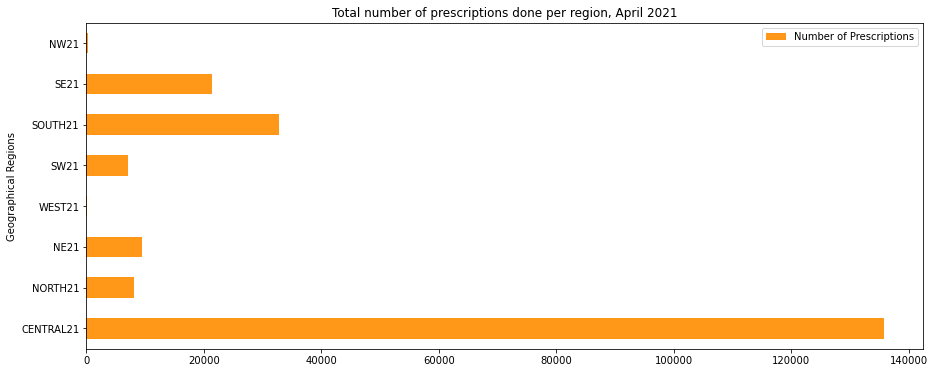

In [25]:
#regions_dataframe_21.plot.barh(x="Regions", y="Number of Prescriptions", alpha=0.9)

fig, axs = plt.subplots(figsize=(15, 6))  
regions_dataframe_21.plot.barh(ax=axs, x="Regions", y="Number of Prescriptions", color = "darkorange", alpha=0.9)           
axs.set_ylabel("Geographical Regions")            
axs.set_title ("Total number of prescriptions done per region, April 2021") 
fig.savefig("num_prescriptions21.png")

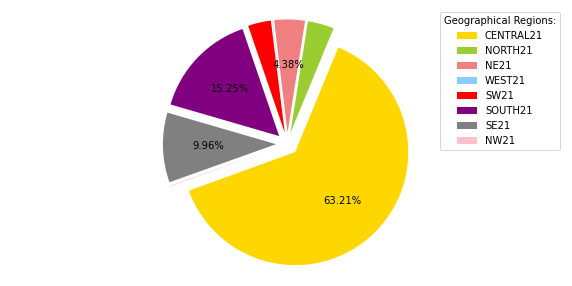

In [26]:
def autopct_generator(limit):
    """Remove percent on small slices."""
    def inner_autopct(pct):
        return ('%.2f%%' % pct) if pct > limit else ''
    return inner_autopct

labels = "CENTRAL21", "NORTH21", "NE21", "WEST21", "SW21", "SOUTH21", "SE21", "NW21"
#sizes = [135716, 8058, 9402, 135, 7051, 32743, 21390, 202]
sizes = [CENTRAL21, NORTH21, NE21, WEST21, SW21, SOUTH21, SE21, NW21]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'red', 'purple', 'grey', 'pink']
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)  

fig1, ax1 = plt.subplots(figsize=(10, 5)) #changes size of the pie chart

# Plot
plt.pie(sizes, explode=explode, colors=colors,
autopct=autopct_generator(4), shadow=False, startangle=200)
plt.legend(labels, title = "Geographical Regions:") #puts the labels as legend instead of around the chart
#fig1, ax1 = plt.subplots(figsize=(6, 5)
plt.axis('equal')
plt.show()

In [27]:
ADDRESS_3_21 = str(input("What is your address?"))

if ADDRESS_3_21 == "MANCHESTER":
    print("This belongs to Central region")
elif ADDRESS_3_21 == "CRUMPSALL" or ADDRESS_3_21 == "CHEETHAM" or ADDRESS_3_21 == "CHEETHAM HILL":
    print("This belongs to North region")
elif ADDRESS_3_21 == "LEIGH" or ADDRESS_3_21 == "WINWICK":
    print("This belongs to West region")
elif ADDRESS_3_21 == "SALE" or ADDRESS_3_21 == "CHORLTON-CUM-HARDY" or ADDRESS_3_21 == "PRESCOT":
    print("This belongs to SW region")
elif ADDRESS_3_21 == "VICTORIA PARK" or ADDRESS_3_21 == "FALLOWFIELD" or ADDRESS_3_21 == "LONGSIGHT" or ADDRESS_3_21 == "LEVENSHULME":
    print("This belongs to SE region")
elif ADDRESS_3_21 == "BLACKLEY" or ADDRESS_3_21 == "COLLYHURST" or ADDRESS_3_21 == "NEW MOSTON,MANCHESTER" or ADDRESS_3_21 == "NEWTON HEATH":
    print("This belongs to NE region")
elif ADDRESS_3_21 == "HULME, MANCHESTER" or ADDRESS_3_21 == "WALMER STREET,RUSHOLME" or ADDRESS_3_21 == "WHALLEY RANGE" or ADDRESS_3_21 == "WHALLEY RANGE,MANCHESTER" or ADDRESS_3_21 == "NORTHENDEN" or ADDRESS_3_21 == "NORTHERN MOOR" or ADDRESS_3_21 == "BAGULEY" or ADDRESS_3_21 == "WITHINGTON" or ADDRESS_3_21 == "WYTHENSHAWE":
    print("This belongs to South region")
elif ADDRESS_3_21 == "WIGAN":
    print("This belongs to NW region")
else:
    print("You've entered an invalid name")
    
    

What is your address?WIGAN
This belongs to NW region


# Comparison bar chart between the two years - prescriptions
https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py




In [31]:
import matplotlib.pyplot as plt
import numpy as np

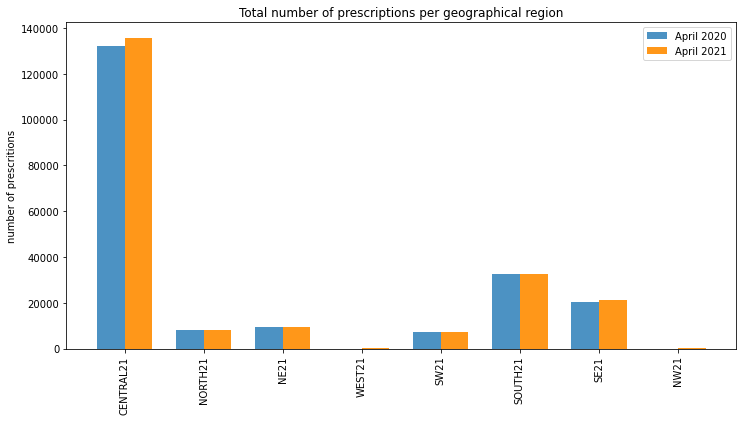

In [32]:
labels = ['CENTRAL', 'NORTH', 'NE', 'WEST', 'SW', 'SOUTH', 'SE', 'NW']
prescriptions_count_2020 = [CENTRAL, NORTH, NE, WEST, SW, SOUTH, SE, 0]
prescriptions_count_2021 = [CENTRAL21, NORTH21, NE21, WEST21, SW21, SOUTH21, SE21, NW21]

x = np.arange(len(regions_dataframe_21["Regions"]))  # the label locations
#x = np.arange(len(labels.keys()))
width = 0.35  # the width of the bars

_ , ax = plt.subplots(figsize=(12, 6))
#fig, axs = plt.subplots(figsize=(12, 6))  
rects1 = ax.bar(x - width/2, prescriptions_count_2020, width, label='April 2020', alpha=0.8)
rects2 = ax.bar(x + width/2, prescriptions_count_2021, width, label='April 2021', color = "darkorange", alpha=0.9)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('number of prescritions')
ax.set_title('Total number of prescriptions per geographical region')
ax.set_xticks(x)
ax.legend()

first_word = pd.Series(regions_dataframe_21["Regions"].tolist()) ## turn series to list
first = first_word.str.split(' ').str[0] ## get 1st word from list for the x axis legend

ax.set_xticklabels(first, rotation=90)

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

#fig.tight_layout()

plt.show()

#from matplotlib.pyplot import figure


Text(0.5, 1.0, 'Total cost of medications per area, April 2020')

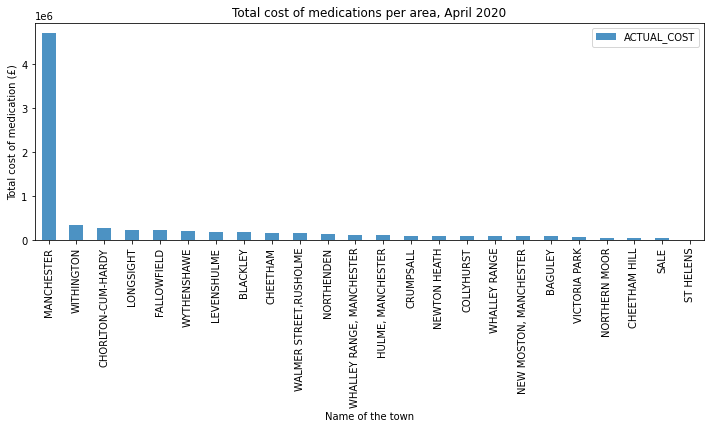

In [33]:
totalcost_region_20 = epd_20[["ADDRESS_3", "ACTUAL_COST"]].groupby("ADDRESS_3").sum()
totalcost_region_20 = totalcost_region_20.sort_values(by=["ACTUAL_COST"], ascending=False)

fig, axs = plt.subplots(figsize=(12, 4))        # Create an empty matplotlib Figure and Axes
totalcost_region_20.plot.bar(ax=axs, alpha=0.8)            # Use pandas to put the area plot on the prepared Figure/Axes
axs.set_ylabel("Total cost of medication (£)")  # Do any matplotlib customization you like
axs.set_xlabel("Name of the town")              # Do any matplotlib customization you like
axs.set_title ("Total cost of medications per area, April 2020") 
#fig.savefig("TotalCost.png")           # Save the Figure/Axes using the existing matplotlib method.

In [34]:
pd.options.display.float_format = "{:,.2f}".format

AC_region_20 = epd_20[["ADDRESS_3", "ACTUAL_COST"]].groupby("ADDRESS_3").mean()
AC_region_20 = AC_region_20.sort_values(by=["ACTUAL_COST"], ascending=False)


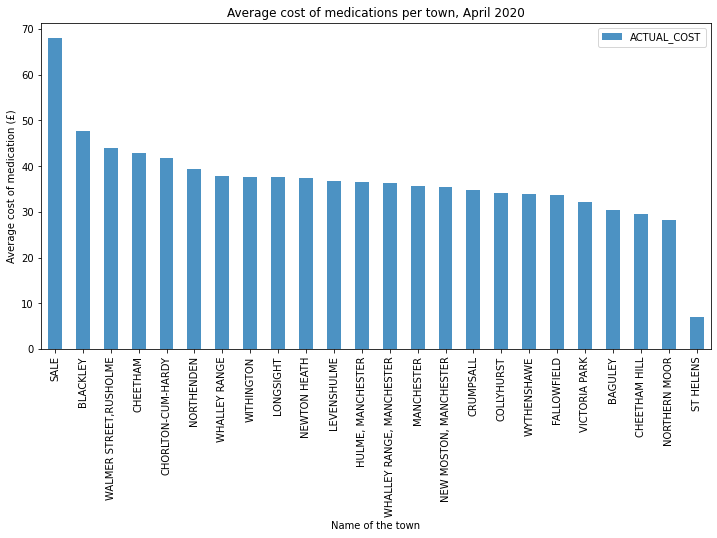

In [35]:
fig, axs = plt.subplots(figsize=(12, 6))        
AC_region_20.plot.bar(ax=axs, alpha=0.8)           
axs.set_ylabel("Average cost of medication (£)")  
axs.set_xlabel("Name of the town")              
axs.set_title ("Average cost of medications per town, April 2020") 
fig.savefig("AverageCost.png")

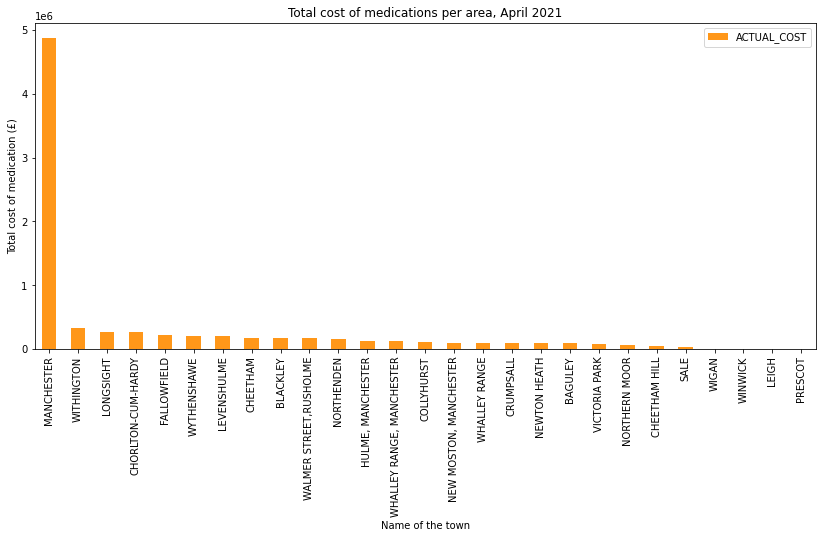

In [36]:
totalcost_region_21 = epd_21[["ADDRESS_3", "ACTUAL_COST"]].groupby("ADDRESS_3").sum()
totalcost_region_21 = totalcost_region_21.sort_values(by=["ACTUAL_COST"], ascending=False)

fig, axs = plt.subplots(figsize=(14, 6))        
totalcost_region_21.plot.bar(ax=axs, color = "darkorange", alpha=0.9)            
axs.set_ylabel("Total cost of medication (£)")  
axs.set_xlabel("Name of the town")             
axs.set_title ("Total cost of medications per area, April 2021") 
fig.savefig("TotalCost21.png")          

In [37]:
pd.options.display.float_format = "{:,.2f}".format

AC_region_21 = epd_21[["ADDRESS_3", "ACTUAL_COST"]].groupby("ADDRESS_3").mean()
AC_region_21 = AC_region_21.sort_values(by=["ACTUAL_COST"], ascending=False)

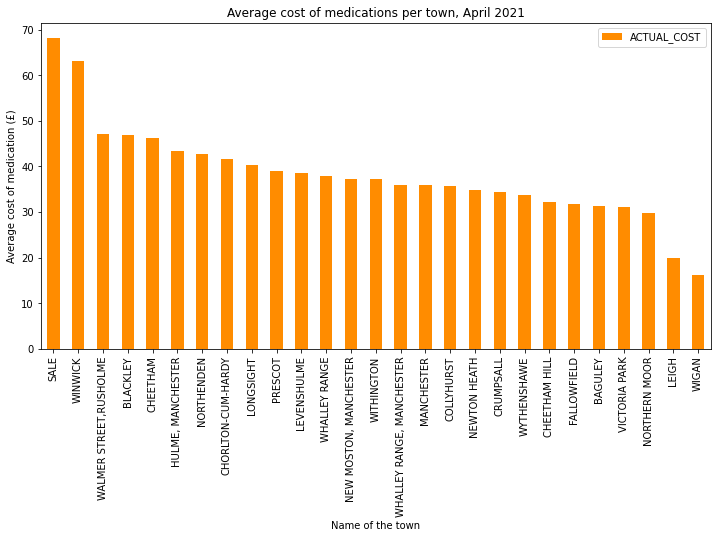

In [38]:
#AC_region_21.plot.bar()

fig, axs = plt.subplots(figsize=(12, 6))        
AC_region_21.plot.bar(ax=axs, color = "darkorange", alpha=1)           
axs.set_ylabel("Average cost of medication (£)")  
axs.set_xlabel("Name of the town")              
axs.set_title ("Average cost of medications per town, April 2021") 
fig.savefig("AverageCost.png")

In [39]:
#MERGE TWO DATAFRAMES

AC_region_20.rename(columns={"ACTUAL_COST": "ACTUAL_COST_20"},inplace=True) #to rename the columns
AC_region_21.rename(columns={"ACTUAL_COST": "ACTUAL_COST_21"},inplace=True)

AC_region_both = pd.merge(AC_region_20, AC_region_21, how="outer", on="ADDRESS_3")
AC_region_both


,ACTUAL_COST_20,ACTUAL_COST_21
ADDRESS_3,,
SALE,67.95,68.06
BLACKLEY,47.70,46.80
"WALMER STREET,RUSHOLME",44.07,47.21
CHEETHAM,42.97,46.16
CHORLTON-CUM-HARDY,41.74,41.74
NORTHENDEN,39.35,42.79
WHALLEY RANGE,37.76,37.97
WITHINGTON,37.68,37.26
LONGSIGHT,37.54,40.26


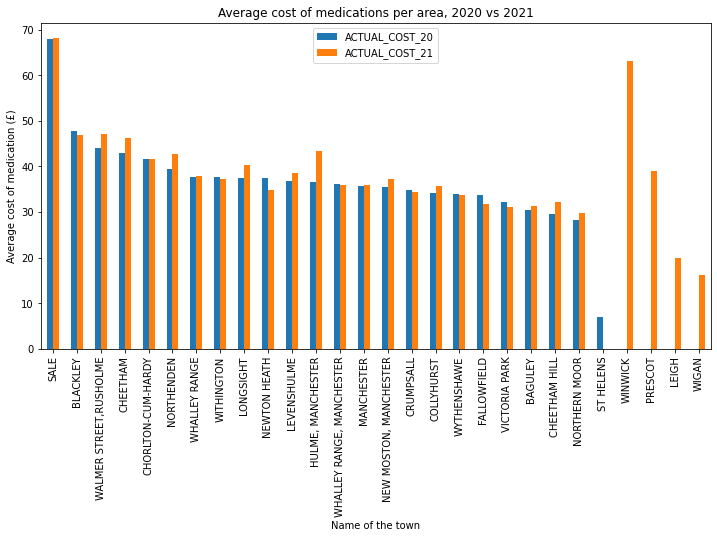

In [40]:
fig, axs = plt.subplots(figsize=(12, 6)) 
AC_region_both.plot.bar(ax=axs)
 
axs.set_ylabel("Average cost of medication (£)") 
axs.set_xlabel("Name of the town")              
axs.set_title ("Average cost of medications per area, 2020 vs 2021") 
fig.savefig("MeanCost20_21.png")           


In [41]:
AC_central_mean = (Regions_central["ACTUAL_COST"].mean())
AC_north_mean = (Regions_north["ACTUAL_COST"].mean())
AC_west_mean = (Regions_west["ACTUAL_COST"].mean())
AC_SW_mean = (Regions_SW["ACTUAL_COST"].mean())
AC_south_mean = (Regions_south["ACTUAL_COST"].mean())
AC_SE_mean = (Regions_SE["ACTUAL_COST"].mean())
AC_NE_mean = (Regions_NE["ACTUAL_COST"].mean())

AC_mean_20 = [AC_central_mean, AC_north_mean, AC_west_mean, AC_SW_mean, AC_south_mean, AC_SE_mean, AC_NE_mean, 0]

In [42]:
AC_central21_mean = (Regions_central21["ACTUAL_COST"].mean())
AC_north21_mean = (Regions_north21["ACTUAL_COST"].mean())
AC_west21_mean = (Regions_west21["ACTUAL_COST"].mean())
AC_SW21_mean = (Regions_SW21["ACTUAL_COST"].mean())
AC_south21_mean = (Regions_south21["ACTUAL_COST"].mean())
AC_SE21_mean = (Regions_SE21["ACTUAL_COST"].mean())
AC_NE21_mean = (Regions_NE21["ACTUAL_COST"].mean())
AC_NW21_mean = (Regions_NW21["ACTUAL_COST"].mean())

AC_mean_21 = [AC_central21_mean, AC_north21_mean, AC_west21_mean, AC_SW21_mean, AC_south21_mean, AC_SE21_mean, AC_NE21_mean, AC_NW21_mean] 


,Regions,Actual cost 2020,Actual cost 2021
0,CENTRAL,35.68,35.85
1,NORTH,37.47,38.08
2,WEST,6.94,31.13
3,SW,43.91,36.78
4,SOUTH,36.56,37.87
5,SE,35.44,36.05
6,NE,40.62,39.99
7,NW,0.00,16.17


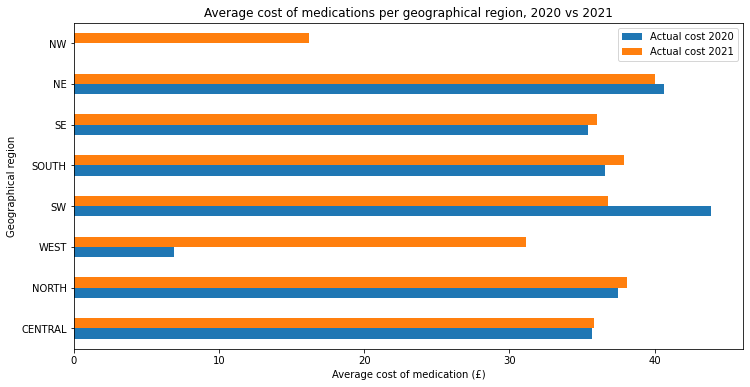

In [43]:
#Another way of creating a dataframe

Geogr_Regions = ["CENTRAL",
            "NORTH",
            "WEST",
            "SW",
            "SOUTH",
            "SE",
            "NE",
            "NW",]
mean_actual_cost_2020 = AC_mean_20 
mean_actual_cost_2021 = AC_mean_21

data = {'Regions': Geogr_Regions,
       'Actual cost 2020': mean_actual_cost_2020,
       'Actual cost 2021': mean_actual_cost_2021,
       }

# Creating the Datafame from dict:
df = pd.DataFrame(data)
display(df)

fig, axs = plt.subplots(figsize=(12, 6)) 
df.plot.barh(ax=axs, x="Regions")
axs.set_ylabel("Geographical region") 
axs.set_xlabel("Average cost of medication (£)")              
axs.set_title ("Average cost of medications per geographical region, 2020 vs 2021") 
fig.savefig("MeanCost20_21_region.png") 



In [44]:
AC_central_sum = (Regions_central["ACTUAL_COST"].sum())
AC_north_sum = (Regions_north["ACTUAL_COST"].sum())
AC_west_sum = (Regions_west["ACTUAL_COST"].sum())
AC_SW_sum = (Regions_SW["ACTUAL_COST"].sum())
AC_south_sum = (Regions_south["ACTUAL_COST"].sum())
AC_SE_sum = (Regions_SE["ACTUAL_COST"].sum())
AC_NE_sum = (Regions_NE["ACTUAL_COST"].sum())

AC_sum_20 = [AC_central_sum, AC_north_sum, AC_west_sum, AC_SW_sum, AC_south_sum, AC_SE_sum, AC_NE_sum, 0] 

In [45]:
AC_central21_sum = (Regions_central21["ACTUAL_COST"].sum())
AC_north21_sum = (Regions_north21["ACTUAL_COST"].sum())
AC_west21_sum = (Regions_west21["ACTUAL_COST"].sum())
AC_SW21_sum = (Regions_SW21["ACTUAL_COST"].sum())
AC_south21_sum = (Regions_south21["ACTUAL_COST"].sum())
AC_SE21_sum = (Regions_SE21["ACTUAL_COST"].sum())
AC_NE21_sum = (Regions_NE21["ACTUAL_COST"].sum())
AC_NW21_sum = (Regions_NW21["ACTUAL_COST"].sum())

AC_sum_21 = [AC_central21_sum, AC_north21_sum, AC_west21_sum, AC_SW21_sum, AC_south21_sum, AC_SE21_sum, AC_NE21_sum, AC_NW21_sum]

,Regions,Actual cost 2020,Actual cost 2021
0,CENTRAL,"4,717,041.29","4,865,586.82"
1,NORTH,"306,278.98","306,839.26"
2,WEST,20.82,"4,202.02"
3,SW,"310,277.69","259,351.87"
4,SOUTH,"1,193,540.84","1,239,841.58"
5,SE,"727,774.84","771,031.24"
6,NE,"376,217.10","376,019.50"
7,NW,0.00,"3,266.14"


Text(0.5, 1.0, 'Total cost of medications per geographical region, 2020 vs 2021')

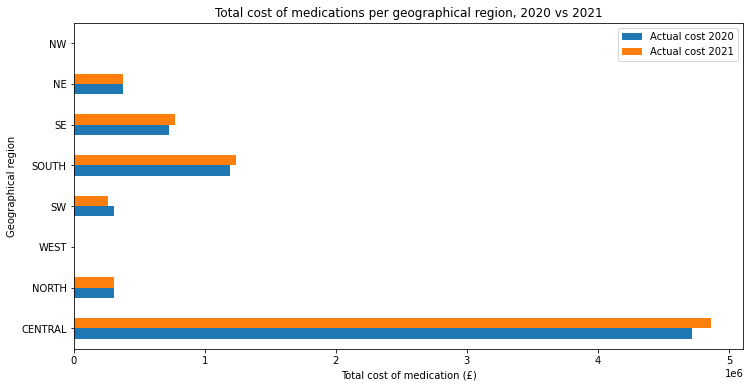

In [46]:
pd.options.display.float_format = "{:,.2f}".format

Geogr_Regions = ["CENTRAL",
            "NORTH",
            "WEST",
            "SW",
            "SOUTH",
            "SE",
            "NE",
            "NW",]
total_actual_cost_2020 = AC_sum_20
total_actual_cost_2021 = AC_sum_21

data = {'Regions': Geogr_Regions,
       'Actual cost 2020': total_actual_cost_2020,
       'Actual cost 2021': total_actual_cost_2021,
       }

# Creating the Datafame from dict:
df = pd.DataFrame(data)
display(df)

fig, axs = plt.subplots(figsize=(12, 6)) 
df.plot.barh(ax=axs, x="Regions")
axs.set_ylabel("Geographical region") 
axs.set_xlabel("Total cost of medication (£)")              
axs.set_title ("Total cost of medications per geographical region, 2020 vs 2021") 
#fig.savefig("MeanCost20_21_region.png") 



# CONCLUSIONS
After analysing this dataset by regions we can conclude that: a) The geographical areas included in the database for April 2020 and April 2021 are not exactly the same. In 2020 St Helen was included, while not in 2021. In 2021, Prescot, Wigan, Winwick and Leigh where added. This information is important to be taken into consideration when comparing the data of one year with the other. b) The central region has the highest number of practices and reasonably the highest number of prescriptions done during both years and the highest total money spent in medications (actual_cost sum). d) However, the mean actual cost (the average money spent) per medication was lower than other regions (such as North, SW and NE) c)The town with the highest mean actual cost on both periods of time analised, was SALE.




<a id="practice"></a>

## PART 3 - PRACTICE LEVEL DATA

In [2]:
# no need to rerun code as already done in Kamal's

#import pandas as pd
#import matplotlib
#import matplotlib.pyplot as plt
#import numpy as np

#epd_20 = pd.read_csv('EPD_202004.csv')
#epd_21 = pd.read_csv('EPD_202104.csv')

pd.set_option("display.max_rows", 10, "display.max_columns", None)

In [3]:
pd.options.display.float_format = "{:,.2f}".format
practice_costs_20 = epd_20[["ACTUAL_COST", "PRACTICE_NAME"]].groupby("PRACTICE_NAME").sum()
practice_costs_20.rename(columns={"ACTUAL_COST": "ACTUAL_COST_20"},inplace=True)
practice_costs_20

,ACTUAL_COST_20
PRACTICE_NAME,
AILSA CRAIG MEDICAL CENTRE,"115,564.45"
AL-SHIFA MEDICAL CENTRE,"18,049.79"
ANCOATS URBAN VILLAGE MEDICAL PRACTICE,"108,061.78"
ASHCROFT SURGERY,"97,651.91"
ASHVILLE SURGERY,"116,318.20"
...,...
WHITLEY ROAD MEDICAL CENTRE,"95,985.42"
WILBRAHAM SURGERY,"58,908.12"
WILLOWBANK SURGERY,"18,583.38"


In [4]:
practice_costs_21 = epd_21[["ACTUAL_COST", "PRACTICE_NAME"]].groupby("PRACTICE_NAME").sum()
practice_costs_21.rename(columns={"ACTUAL_COST": "ACTUAL_COST_21"},inplace=True)
practice_costs_21

,ACTUAL_COST_21
PRACTICE_NAME,
ADULT ADHD WIGAN/LEIGH NMP,"2,206.30"
AILSA CRAIG MEDICAL CENTRE,"142,057.09"
AL-SHIFA MEDICAL CENTRE,"25,824.42"
ANCOATS URBAN VILLAGE MEDICAL PRACTICE,"114,835.70"
ARDWICK MEDICAL PRACTICE,"71,783.32"
...,...
WIGAN RECOVERY TEAM NORTH,"1,785.64"
WILBRAHAM SURGERY,"64,827.67"
WILLOWBANK SURGERY,"19,005.35"


In [5]:
practice_cost_both = pd.merge(practice_costs_20, practice_costs_21, how="outer", on="PRACTICE_NAME")
practice_cost_both

,ACTUAL_COST_20,ACTUAL_COST_21
PRACTICE_NAME,,
AILSA CRAIG MEDICAL CENTRE,"115,564.45","142,057.09"
AL-SHIFA MEDICAL CENTRE,"18,049.79","25,824.42"
ANCOATS URBAN VILLAGE MEDICAL PRACTICE,"108,061.78","114,835.70"
ASHCROFT SURGERY,"97,651.91","102,308.22"
ASHVILLE SURGERY,"116,318.20","120,282.51"
...,...,...
WIGAN & LEIGH RECOVERY TEAM,NaN,"1,995.72"
WIGAN ASSESSMENT TEAM,NaN,0.91
WIGAN CAMHS,NaN,"1,097.08"


In [6]:
practice_cost_both.dropna(inplace=True)
practice_cost_both

,ACTUAL_COST_20,ACTUAL_COST_21
PRACTICE_NAME,,
AILSA CRAIG MEDICAL CENTRE,"115,564.45","142,057.09"
AL-SHIFA MEDICAL CENTRE,"18,049.79","25,824.42"
ANCOATS URBAN VILLAGE MEDICAL PRACTICE,"108,061.78","114,835.70"
ASHCROFT SURGERY,"97,651.91","102,308.22"
ASHVILLE SURGERY,"116,318.20","120,282.51"
...,...,...
WHITLEY ROAD MEDICAL CENTRE,"95,985.42","105,601.37"
WILBRAHAM SURGERY,"58,908.12","64,827.67"
WILLOWBANK SURGERY,"18,583.38","19,005.35"


In [7]:
practice_cost_both["RAW_DIFFERENCE"] = practice_cost_both["ACTUAL_COST_21"] - practice_cost_both["ACTUAL_COST_20"]
practice_cost_both["%_DIFFERENCE"] = practice_cost_both["RAW_DIFFERENCE"] / practice_cost_both["ACTUAL_COST_20"] * 100
practice_cost_both

,ACTUAL_COST_20,ACTUAL_COST_21,RAW_DIFFERENCE,%_DIFFERENCE
PRACTICE_NAME,,,,
AILSA CRAIG MEDICAL CENTRE,"115,564.45","142,057.09","26,492.64",22.92
AL-SHIFA MEDICAL CENTRE,"18,049.79","25,824.42","7,774.63",43.07
ANCOATS URBAN VILLAGE MEDICAL PRACTICE,"108,061.78","114,835.70","6,773.92",6.27
ASHCROFT SURGERY,"97,651.91","102,308.22","4,656.31",4.77
ASHVILLE SURGERY,"116,318.20","120,282.51","3,964.31",3.41
...,...,...,...,...
WHITLEY ROAD MEDICAL CENTRE,"95,985.42","105,601.37","9,615.95",10.02
WILBRAHAM SURGERY,"58,908.12","64,827.67","5,919.55",10.05
WILLOWBANK SURGERY,"18,583.38","19,005.35",421.97,2.27


In [8]:
practice_cost_both.describe()

,ACTUAL_COST_20,ACTUAL_COST_21,RAW_DIFFERENCE,%_DIFFERENCE
count,106.00,106.00,106.00,106.00
mean,"73,325.81","75,931.11","2,605.30",107.13
std,"47,929.27","49,345.19","7,002.53",697.46
min,1.17,6.89,"-16,914.09",-91.79
25%,"37,308.89","36,114.20","-1,163.65",-2.08
50%,"73,534.65","77,476.41","2,199.38",3.99
75%,"106,059.09","109,792.25","5,712.88",12.40
max,"190,527.06","190,169.62","26,492.64","6,869.84"


In [9]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
practice_cost_both.sort_values(by=['%_DIFFERENCE'])

,ACTUAL_COST_20,ACTUAL_COST_21,RAW_DIFFERENCE,%_DIFFERENCE
PRACTICE_NAME,,,,
PCEC,"1,305.72",107.15,"-1,198.57",-91.79
CRISIS RESPONSE TEAM,309.26,74.34,-234.92,-75.96
UHSM COMMUNITY SERVICES,"9,809.43","5,739.12","-4,070.31",-41.49
WEST GORTON MEDICAL PRACTICE,"109,616.62","93,691.72","-15,924.90",-14.53
DROYLSDEN RD FAMILY PRACTICE,"119,707.01","102,792.92","-16,914.09",-14.13
BEACON MEDICAL CENTRE,"76,726.35","65,985.60","-10,740.74",-14.00
CORKLAND ROAD MEDICAL PRACTICE,"71,213.43","61,792.01","-9,421.42",-13.23
FALLOWFIELD MEDICAL CENTRE,"35,427.08","31,207.74","-4,219.34",-11.91
FERNCLOUGH SURGERY,"25,343.04","22,594.48","-2,748.56",-10.85


In [10]:
practice_cost_both.sort_values(by=['ACTUAL_COST_20'])

,ACTUAL_COST_20,ACTUAL_COST_21,RAW_DIFFERENCE,%_DIFFERENCE
PRACTICE_NAME,,,,
NORTHERN HEALTH GPPO A & E HUB,1.17,6.89,5.71,486.37
BUCCLEUCH LODGE ICF,3.58,249.66,246.08,"6,869.84"
BEACON MEDICAL SERVICES LIMITED,28.97,635.89,606.93,"2,095.32"
CRISIS RESPONSE TEAM,309.26,74.34,-234.92,-75.96
SMGPF,345.69,"1,611.21","1,265.52",366.09
PRIMARY CARE MANCHESTER LIMITED,524.59,"2,546.04","2,021.45",385.34
TURNING POINT SMITHFIELD SERVICE,595.67,"1,013.82",418.15,70.20
COMMUNITY PAEDIATRICIANS,767.24,"1,935.74","1,168.51",152.30
MFT CHILDRENS COMMUNITY SERVICES,776.24,"1,397.37",621.13,80.02


In [11]:
indexLowspend = practice_cost_both[ practice_cost_both['ACTUAL_COST_20'] < 10000 ].index
practice_cost_both.drop(indexLowspend, inplace=True)
practice_cost_both.sort_values(by=['ACTUAL_COST_20'])

,ACTUAL_COST_20,ACTUAL_COST_21,RAW_DIFFERENCE,%_DIFFERENCE
PRACTICE_NAME,,,,
MFT ADULT COMMUNITY SERVICES,"15,521.04","17,879.89","2,358.85",15.20
AL-SHIFA MEDICAL CENTRE,"18,049.79","25,824.42","7,774.63",43.07
WILLOWBANK SURGERY,"18,583.38","19,005.35",421.97,2.27
CONTINENCE PRESCRIBING SERVICE,"20,910.48","28,110.79","7,200.30",34.43
CMFT CONTINENCE PRESCRIBING SERVICE,"21,925.83","32,797.21","10,871.38",49.58
FERNCLOUGH SURGERY,"25,343.04","22,594.48","-2,748.56",-10.85
MP VICTORIA MILL,"31,777.13","36,382.58","4,605.45",14.49
FALLOWFIELD MEDICAL CENTRE,"35,427.08","31,207.74","-4,219.34",-11.91
THE VALLANCE CENTRE,"35,627.02","33,857.19","-1,769.83",-4.97


In [12]:
practice_cost_both.describe()

,ACTUAL_COST_20,ACTUAL_COST_21,RAW_DIFFERENCE,%_DIFFERENCE
count,91.00,91.00,91.00,91.00
mean,"85,158.79","88,028.20","2,869.41",4.29
std,"40,971.75","42,357.04","7,479.95",10.93
min,"15,521.04","17,879.89","-16,914.09",-14.53
25%,"52,287.15","54,360.97","-1,700.80",-2.31
50%,"85,401.35","89,709.87","2,753.82",3.32
75%,"112,590.53","115,079.12","6,987.11",9.52
max,"190,527.06","190,169.62","26,492.64",49.58


In [13]:
import scipy.stats as stats
stats.ttest_rel(practice_cost_both['ACTUAL_COST_20'], practice_cost_both['ACTUAL_COST_21'])

Ttest_relResult(statistic=-3.659441351650247, pvalue=0.0004257107474994922)

In [14]:
practice_cost_both['ACTUAL_COST_21']

PRACTICE_NAME
AILSA CRAIG MEDICAL CENTRE               142,057.09
AL-SHIFA MEDICAL CENTRE                   25,824.42
ANCOATS URBAN VILLAGE MEDICAL PRACTICE   114,835.70
ASHCROFT SURGERY                         102,308.22
ASHVILLE SURGERY                         120,282.51
BARLOW MEDICAL CENTRE                    143,598.13
BEACON MEDICAL CENTRE                     65,985.60
BENCHILL MEDICAL PRACTICE                190,169.62
BODEY MEDICAL CENTRE                     154,410.46
BOWLAND MEDICAL PRACTICE                 136,510.87
BROOKLANDS MEDICAL PRACTICE               87,571.47
CHARLESTOWN MD                            60,583.51
CHEETHAM HILL PRIMARY CARE CENTRE        136,670.42
CHORLTON FAMILY PRACTICE                 156,061.81
CITY HEALTH CENTRE                        42,945.31
CMFT CONTINENCE PRESCRIBING SERVICE       32,797.21
CONRAN MEDICAL CENTRE                     78,358.25
CONTINENCE PRESCRIBING SERVICE            28,110.79
CONTINENCE SERVICE PROJECT                99,546.6

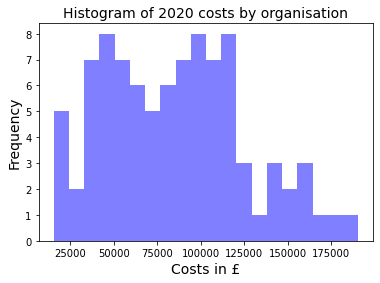

In [15]:
practice_cost_both["ACTUAL_COST_20"].plot.hist(bins=20, facecolor='blue', alpha=0.5)
#where alpha = transparency
plt.title("Histogram of 2020 costs by organisation", fontsize=14)
plt.xlabel("Costs in £", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()

In [16]:
stats.shapiro(practice_cost_both["ACTUAL_COST_20"])
#The null-hypothesis of this test is that the population is normally distributed. Thus, if the p value is less than the chosen alpha level, then the null hypothesis is rejected and there is evidence that the data tested are not normally distributed.

ShapiroResult(statistic=0.9739976525306702, pvalue=0.06514483690261841)

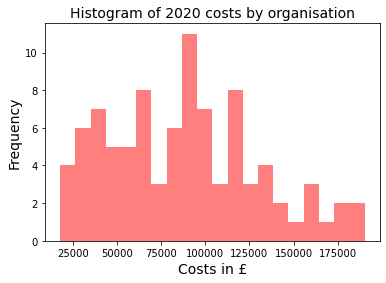

In [17]:
practice_cost_both["ACTUAL_COST_21"].plot.hist(bins=20, facecolor='red', alpha=0.5)
#where alpha = transparency
#normed = 
plt.title("Histogram of 2020 costs by organisation", fontsize=14)
plt.xlabel("Costs in £", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()

In [18]:
stats.shapiro(practice_cost_both["ACTUAL_COST_21"])
#The null-hypothesis of this test is that the population is normally distributed. Thus, if the p value is less than the chosen alpha level, then the null hypothesis is rejected and there is evidence that the data tested are not normally distributed.

ShapiroResult(statistic=0.9685119390487671, pvalue=0.026470262557268143)

In [19]:
stats.wilcoxon(practice_cost_both['ACTUAL_COST_20'], practice_cost_both['ACTUAL_COST_21'])

WilcoxonResult(statistic=1197.0, pvalue=0.00039070533947871693)

In [20]:
w, p = stats.wilcoxon(practice_cost_both['ACTUAL_COST_20'], practice_cost_both['ACTUAL_COST_21'])
w, p

(1197.0, 0.00039070533947871693)

In [21]:
meancost20 = practice_cost_both["ACTUAL_COST_20"].mean()
meancost21 = practice_cost_both["ACTUAL_COST_21"].mean()
meancosts = [[meancost20, "2020"], [meancost21, "2021"]]
meancostsdf = pd.DataFrame(meancosts, columns=["Mean Cost of Organisations", "Year"])
print(meancostsdf)

   Mean Cost of Organisations  Year
0                   85,158.79  2020
1                   88,028.20  2021


In [22]:
secost20 = practice_cost_both["ACTUAL_COST_20"].sem()
secost21 = practice_cost_both["ACTUAL_COST_21"].sem()
print (secost20)
print(secost21)

4295.006668949867
4440.223966465552


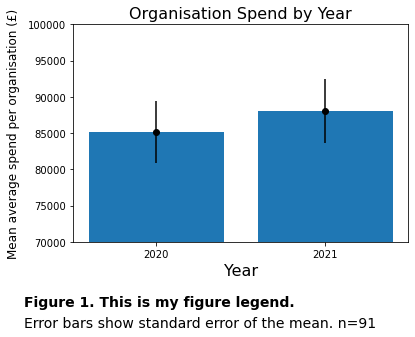

In [23]:
plt.bar(meancostsdf["Year"], meancostsdf["Mean Cost of Organisations"], align='center')
plt.title("Organisation Spend by Year", fontsize=16)
plt.xlabel("Year",fontsize=16)
plt.text(0.01, -0.1, "Figure 1. This is my figure legend.", fontsize=14, fontweight=900,transform=plt.gcf().transFigure)
plt.text(0.01, -0.17, "Error bars show standard error of the mean. n=91", fontsize=14, fontweight=100,
         transform=plt.gcf().transFigure)
plt.ylabel("Mean average spend per organisation (£)", fontsize=12, labelpad=8)
plt.ylim(70000, 100000)
c=[secost20, secost21]
plt.errorbar(meancostsdf["Year"], meancostsdf["Mean Cost of Organisations"], yerr=c, color="black", fmt="o")
plt.show()

In [24]:
#The following code was not written by me and taken from https://stackoverflow.com/questions/11517986/indicating-the-statistically-significant-difference-in-bar-graph#

def barplot_annotate_brackets(num1, num2, data, center, height, yerr=None, dh=.05, barh=.05, fs=None, maxasterix=None):
    """ 
    Annotate barplot with p-values.

    :param num1: number of left bar to put bracket over
    :param num2: number of right bar to put bracket over
    :param data: string to write or number for generating asterixes
    :param center: centers of all bars (like plt.bar() input)
    :param height: heights of all bars (like plt.bar() input)
    :param yerr: yerrs of all bars (like plt.bar() input)
    :param dh: height offset over bar / bar + yerr in axes coordinates (0 to 1)
    :param barh: bar height in axes coordinates (0 to 1)
    :param fs: font size
    :param maxasterix: maximum number of asterixes to write (for very small p-values)
    """

    if type(data) is str:
        text = data
    else:
        # * is p < 0.05
        # ** is p < 0.005
        # *** is p < 0.0005
        # etc.
        text = ''
        p = .05

        while data < p:
            text += '*'
            p /= 10.

            if maxasterix and len(text) == maxasterix:
                break

        if len(text) == 0:
            text = 'n. s.'

    lx, ly = center[num1], height[num1]
    rx, ry = center[num2], height[num2]

    if yerr:
        ly += yerr[num1]
        ry += yerr[num2]

    ax_y0, ax_y1 = plt.gca().get_ylim()
    dh *= (ax_y1 - ax_y0)
    barh *= (ax_y1 - ax_y0)

    y = max(ly, ry) + dh

    barx = [lx, lx, rx, rx]
    bary = [y, y+barh, y+barh, y]
    mid = ((lx+rx)/2, y+barh)

    plt.plot(barx, bary, c='black')

    kwargs = dict(ha='center', va='bottom')
    if fs is not None:
        kwargs['fontsize'] = fs

    plt.text(*mid, text, **kwargs)

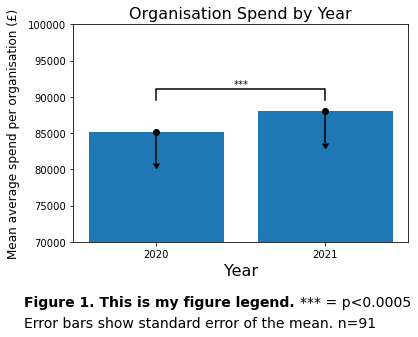

In [25]:
plt.bar(meancostsdf["Year"], meancostsdf["Mean Cost of Organisations"], align='center')
plt.title("Organisation Spend by Year", fontsize=16)
plt.xlabel("Year",fontsize=16)
plt.text(0.01, -0.1, "Figure 1. This is my figure legend.", fontsize=14, fontweight=900,transform=plt.gcf().transFigure)
plt.text(0.65, -0.1, "*** = p<0.0005", fontsize=14, fontweight=100,transform=plt.gcf().transFigure)
plt.text(0.01, -0.17, "Error bars show standard error of the mean. n=91", fontsize=14, fontweight=100,transform=plt.gcf().transFigure)
plt.ylabel("Mean average spend per organisation (£)", fontsize=12, labelpad=8)
plt.ylim(70000, 100000)
c=[secost20, secost21]
plt.errorbar(meancostsdf["Year"], meancostsdf["Mean Cost of Organisations"], yerr=c, color="black", fmt="o", uplims=True)

#using extra code above to add in significance bars
heights = meancostsdf["Mean Cost of Organisations"]
bars = np.arange(len(heights))
barplot_annotate_brackets(0, 1, p, bars, heights)
fig = matplotlib.pyplot.gcf()


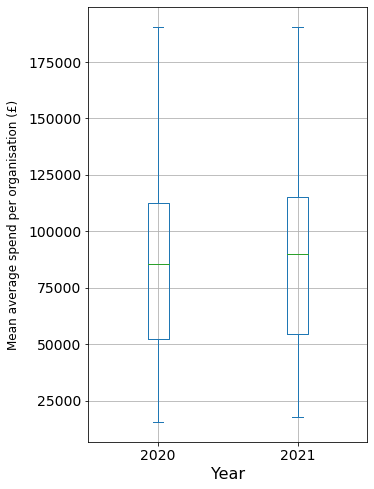

In [26]:
df = pd.DataFrame({'2020': practice_cost_both["ACTUAL_COST_20"], '2021': practice_cost_both["ACTUAL_COST_21"]})
df.plot.box(fontsize=14, grid=True, figsize=(5,8))
plt.ylabel("Mean average spend per organisation (£)", fontsize=12, labelpad=8)
plt.xlabel("Year",fontsize=16)
plt.show()

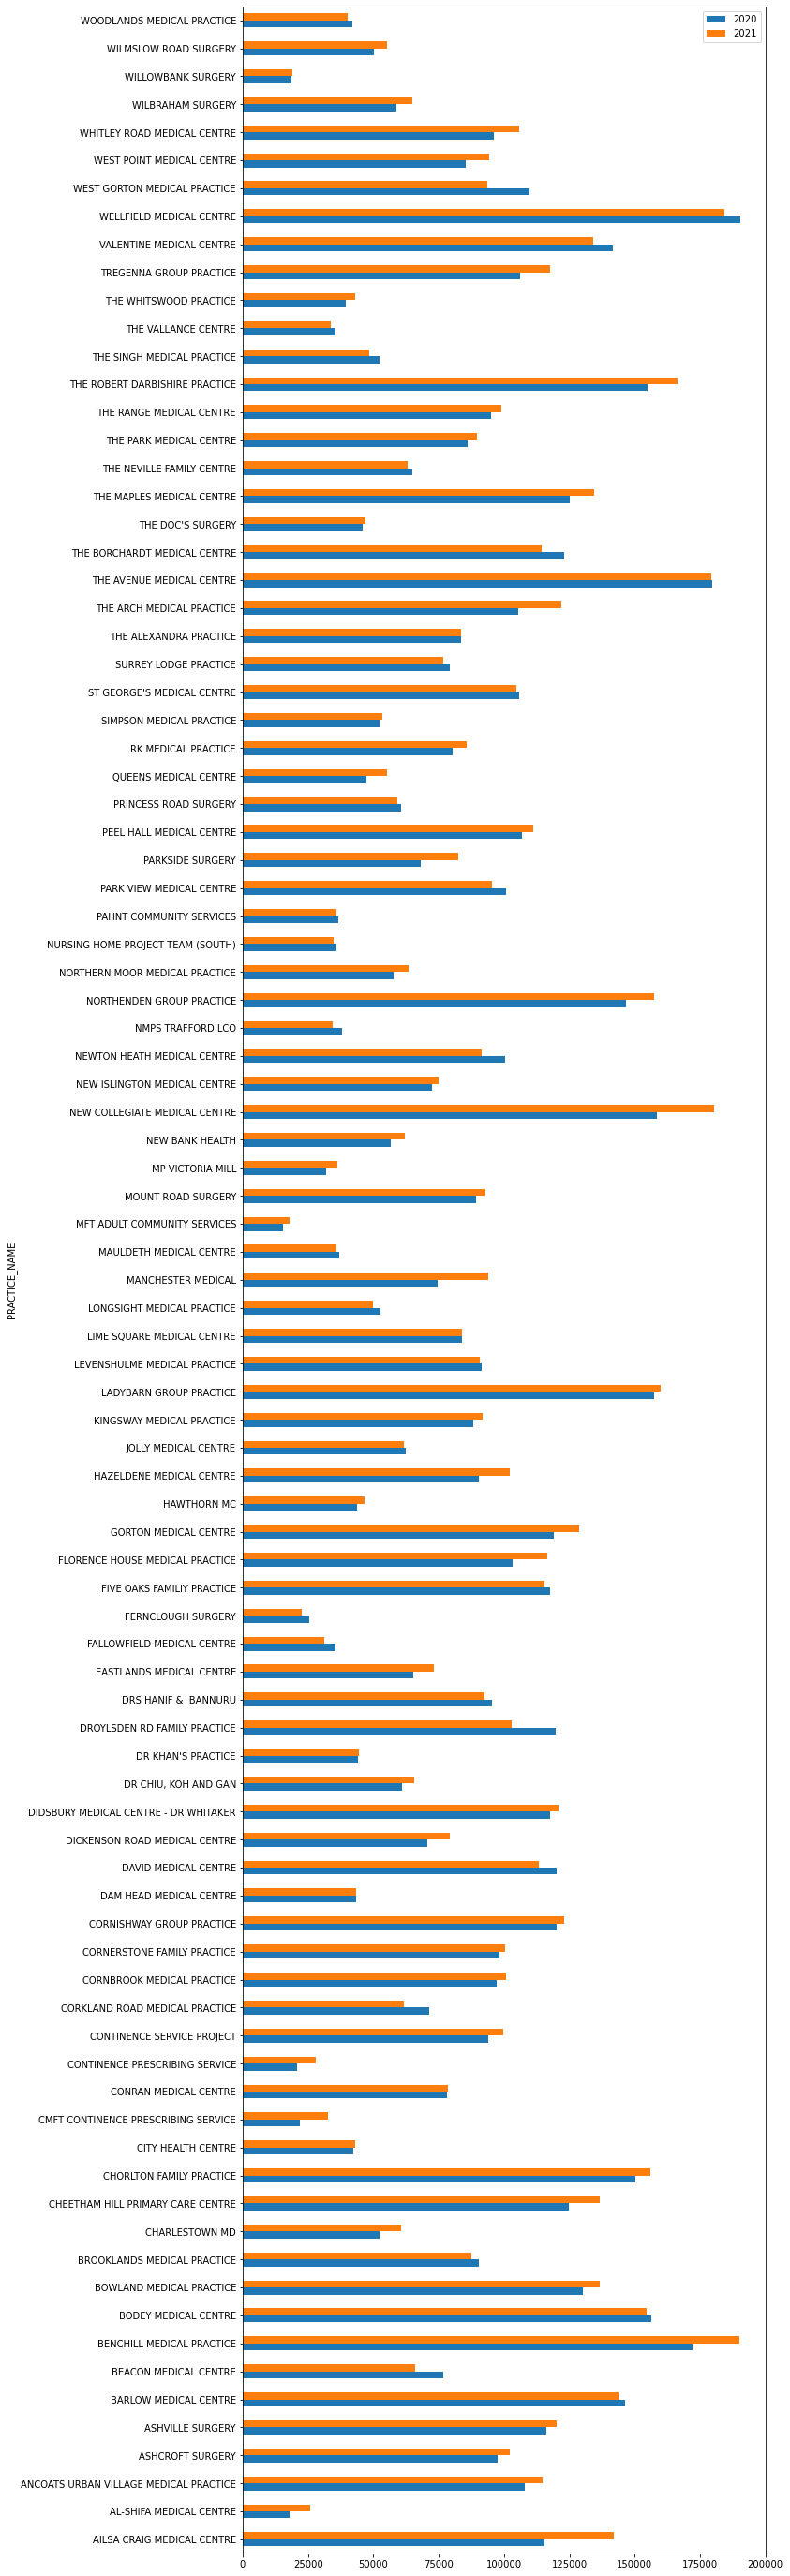

In [27]:
df = pd.DataFrame({'2020': practice_cost_both["ACTUAL_COST_20"], '2021': practice_cost_both["ACTUAL_COST_21"]}, index=practice_cost_both.index)
ax = df.plot.barh()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 50)
plt.show()

In [28]:
practice_cost_both.sort_values(by=['%_DIFFERENCE'])

,ACTUAL_COST_20,ACTUAL_COST_21,RAW_DIFFERENCE,%_DIFFERENCE
PRACTICE_NAME,,,,
WEST GORTON MEDICAL PRACTICE,"109,616.62","93,691.72","-15,924.90",-14.53
DROYLSDEN RD FAMILY PRACTICE,"119,707.01","102,792.92","-16,914.09",-14.13
BEACON MEDICAL CENTRE,"76,726.35","65,985.60","-10,740.74",-14.00
CORKLAND ROAD MEDICAL PRACTICE,"71,213.43","61,792.01","-9,421.42",-13.23
FALLOWFIELD MEDICAL CENTRE,"35,427.08","31,207.74","-4,219.34",-11.91
FERNCLOUGH SURGERY,"25,343.04","22,594.48","-2,748.56",-10.85
NEWTON HEATH MEDICAL CENTRE,"100,557.53","91,269.24","-9,288.29",-9.24
NMPS TRAFFORD LCO,"37,984.64","34,581.39","-3,403.25",-8.96
THE SINGH MEDICAL PRACTICE,"52,359.83","48,564.89","-3,794.94",-7.25


In [29]:
high_increase_spend = practice_cost_both[practice_cost_both['%_DIFFERENCE'] > 20]
high_increase_spend

,ACTUAL_COST_20,ACTUAL_COST_21,RAW_DIFFERENCE,%_DIFFERENCE
PRACTICE_NAME,,,,
AILSA CRAIG MEDICAL CENTRE,"115,564.45","142,057.09","26,492.64",22.92
AL-SHIFA MEDICAL CENTRE,"18,049.79","25,824.42","7,774.63",43.07
CMFT CONTINENCE PRESCRIBING SERVICE,"21,925.83","32,797.21","10,871.38",49.58
CONTINENCE PRESCRIBING SERVICE,"20,910.48","28,110.79","7,200.30",34.43
MANCHESTER MEDICAL,"74,673.85","93,860.64","19,186.79",25.69
PARKSIDE SURGERY,"67,984.05","82,590.81","14,606.75",21.49


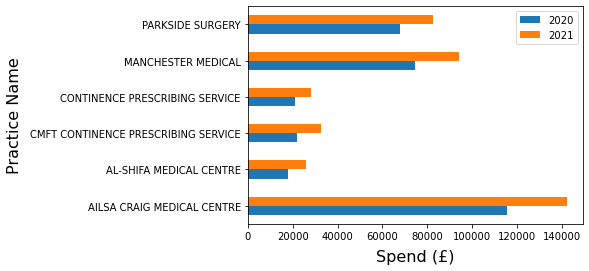

In [30]:
df = pd.DataFrame({'2020': high_increase_spend["ACTUAL_COST_20"], '2021': high_increase_spend["ACTUAL_COST_21"]}, index=high_increase_spend.index)
ax = df.plot.barh()
plt.ylabel("Practice Name", fontsize=16, labelpad=8)
plt.xlabel("Spend (£)",fontsize=16, labelpad=8)
plt.show()

In [31]:
pd.set_option("display.max_rows", 10, "display.max_columns", None)
acmc20 = epd_20[epd_20["PRACTICE_NAME"] == "AILSA CRAIG MEDICAL CENTRE"]
acmc20.reset_index()
acmc21 = epd_21[epd_21["PRACTICE_NAME"] == "AILSA CRAIG MEDICAL CENTRE"]
acmc21.reset_index()

,index,YEAR_MONTH,REGIONAL_OFFICE_NAME,REGIONAL_OFFICE_CODE,STP_NAME,STP_CODE,PCO_NAME,PCO_CODE,PRACTICE_NAME,PRACTICE_CODE,ADDRESS_1,ADDRESS_2,ADDRESS_3,ADDRESS_4,POSTCODE,BNF_CHEMICAL_SUBSTANCE,CHEMICAL_SUBSTANCE_BNF_DESCR,BNF_CODE,BNF_DESCRIPTION,BNF_CHAPTER_PLUS_CODE,QUANTITY,ITEMS,TOTAL_QUANTITY,ADQUSAGE,NIC,ACTUAL_COST,UNIDENTIFIED
0,13612,202104,NORTH WEST,Y62,GREATER MANCHESTER HSC PARTNERSHIP STP,QOP,MANCHESTER CCG,14L00,AILSA CRAIG MEDICAL CENTRE,P84009,AILSA CRAIG MEDICAL GROUP,270 DICKENSON ROAD,LONGSIGHT,MANCHESTER,M13 0YL,0403030Z0,Citalopram hydrochloride,0403030Z0AAAAAA,Citalopram 40mg/ml oral drops sugar free,04: Central Nervous System,30.00,1,30.00,60.00,27.50,25.63,False
1,13613,202104,NORTH WEST,Y62,GREATER MANCHESTER HSC PARTNERSHIP STP,QOP,MANCHESTER CCG,14L00,AILSA CRAIG MEDICAL CENTRE,P84009,AILSA CRAIG MEDICAL GROUP,270 DICKENSON ROAD,LONGSIGHT,MANCHESTER,M13 0YL,2122,Emollients,21220000233,Cetraben cream,21: Appliances,"1,050.00",1,"1,050.00",0.00,27.86,25.96,False
2,13614,202104,NORTH WEST,Y62,GREATER MANCHESTER HSC PARTNERSHIP STP,QOP,MANCHESTER CCG,14L00,AILSA CRAIG MEDICAL CENTRE,P84009,AILSA CRAIG MEDICAL GROUP,270 DICKENSON ROAD,LONGSIGHT,MANCHESTER,M13 0YL,0302000K0,Budesonide,0302000K0AAAKAK,Budesonide 100micrograms/dose dry powder inhaler,03: Respiratory System,1.00,1,1.00,50.00,14.25,13.29,False
3,13615,202104,NORTH WEST,Y62,GREATER MANCHESTER HSC PARTNERSHIP STP,QOP,MANCHESTER CCG,14L00,AILSA CRAIG MEDICAL CENTRE,P84009,AILSA CRAIG MEDICAL GROUP,270 DICKENSON ROAD,LONGSIGHT,MANCHESTER,M13 0YL,0301011R0,Salbutamol,0301011R0BMABBU,Airomir 100micrograms/dose Autohaler,03: Respiratory System,1.00,2,2.00,100.00,12.04,11.24,False
4,13616,202104,NORTH WEST,Y62,GREATER MANCHESTER HSC PARTNERSHIP STP,QOP,MANCHESTER CCG,14L00,AILSA CRAIG MEDICAL CENTRE,P84009,AILSA CRAIG MEDICAL GROUP,270 DICKENSON ROAD,LONGSIGHT,MANCHESTER,M13 0YL,0601023AM,Canagliflozin,0601023AMAAAAAA,Canagliflozin 100mg tablets,06: Endocrine System,56.00,1,56.00,0.00,73.17,68.26,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3153,16765,202104,NORTH WEST,Y62,GREATER MANCHESTER HSC PARTNERSHIP STP,QOP,MANCHESTER CCG,14L00,AILSA CRAIG MEDICAL CENTRE,P84009,AILSA CRAIG MEDICAL GROUP,270 DICKENSON ROAD,LONGSIGHT,MANCHESTER,M13 0YL,0209000C0,Clopidogrel,0209000C0AAAAAA,Clopidogrel 75mg tablets,02: Cardiovascular System,7.00,29,203.00,203.00,12.47,14.87,False
3154,16766,202104,NORTH WEST,Y62,GREATER MANCHESTER HSC PARTNERSHIP STP,QOP,MANCHESTER CCG,14L00,AILSA CRAIG MEDICAL CENTRE,P84009,AILSA CRAIG MEDICAL GROUP,270 DICKENSON ROAD,LONGSIGHT,MANCHESTER,M13 0YL,0206020C0,Diltiazem hydrochloride,0206020C0BBACAS,Tildiem Retard 120mg tablets,02: Cardiovascular System,84.00,1,84.00,56.00,10.73,10.11,False
3155,16767,202104,NORTH WEST,Y62,GREATER MANCHESTER HSC PARTNERSHIP STP,QOP,MANCHESTER CCG,14L00,AILSA CRAIG MEDICAL CENTRE,P84009,AILSA CRAIG MEDICAL GROUP,270 DICKENSON ROAD,LONGSIGHT,MANCHESTER,M13 0YL,0402010AB,Quetiapine,0402010ABAAABAB,Quetiapine 25mg tablets,04: Central Nervous System,56.00,2,112.00,9.33,3.78,3.75,False
3156,16768,202104,NORTH WEST,Y62,GREATER MANCHESTER HSC PARTNERSHIP STP,QOP,MANCHESTER CCG,14L00,AILSA CRAIG MEDICAL CENTRE,P84009,AILSA CRAIG MEDICAL GROUP,270 DICKENSON ROAD,LONGSIGHT,MANCHESTER,M13 0YL,0402010AB,Quetiapine,0402010ABBCADAY,Sondate XL 400mg tablets,04: Central Nervous System,7.00,4,28.00,37.33,28.00,26.53,False


In [32]:
acmc20_cost = acmc20[["ACTUAL_COST","BNF_CHAPTER_PLUS_CODE"]].groupby("BNF_CHAPTER_PLUS_CODE").sum()
acmc20_cost.rename(columns={"ACTUAL_COST": "ACTUAL_COST_20"},inplace=True)
acmc21_cost = acmc21[["ACTUAL_COST","BNF_CHAPTER_PLUS_CODE"]].groupby("BNF_CHAPTER_PLUS_CODE").sum()
acmc21_cost.rename(columns={"ACTUAL_COST": "ACTUAL_COST_21"},inplace=True)
acmc_both = pd.merge(acmc20_cost, acmc21_cost, how="outer", on="BNF_CHAPTER_PLUS_CODE")

In [33]:
acmc_both

,ACTUAL_COST_20,ACTUAL_COST_21
BNF_CHAPTER_PLUS_CODE,,
01: Gastro-Intestinal System,"5,684.72","10,215.54"
02: Cardiovascular System,"10,458.98","14,866.77"
03: Respiratory System,"13,453.62","14,185.89"
04: Central Nervous System,"21,453.82","22,957.82"
05: Infections,"1,708.30","2,942.23"
...,...,...
15: Anaesthesia,144.41,41.69
19: Other Drugs and Preparations,318.09,354.33
20: Dressings,539.48,"1,789.68"


In [34]:
acmc_both["RAW_DIFFERENCE"] = acmc_both["ACTUAL_COST_21"] - acmc_both["ACTUAL_COST_20"]
acmc_both["%_DIFFERENCE"] = acmc_both["RAW_DIFFERENCE"] / acmc_both["ACTUAL_COST_20"] * 100
acmc_both["BNF_CHAPTER_PLUS_CODE"] = acmc_both.index
acmc_both.sort_values(by=['%_DIFFERENCE'])

,ACTUAL_COST_20,ACTUAL_COST_21,RAW_DIFFERENCE,%_DIFFERENCE,BNF_CHAPTER_PLUS_CODE
BNF_CHAPTER_PLUS_CODE,,,,,
15: Anaesthesia,144.41,41.69,-102.72,-71.13,15: Anaesthesia
08: Malignant Disease and Immunosuppression,"1,721.18",726.75,-994.43,-57.78,08: Malignant Disease and Immunosuppression
11: Eye,"3,121.19","3,042.39",-78.80,-2.52,11: Eye
09: Nutrition and Blood,"10,428.95","10,399.76",-29.19,-0.28,09: Nutrition and Blood
03: Respiratory System,"13,453.62","14,185.89",732.27,5.44,03: Respiratory System
...,...,...,...,...,...
"07: Obstetrics, Gynaecology and Urinary-Tract Disorders","3,488.93","5,140.31","1,651.38",47.33,"07: Obstetrics, Gynaecology and Urinary-Tract ..."
14: Immunological Products and Vaccines,19.20,31.30,12.09,62.98,14: Immunological Products and Vaccines
05: Infections,"1,708.30","2,942.23","1,233.93",72.23,05: Infections


In [35]:
acmc_both_only_increase = acmc_both[acmc_both['RAW_DIFFERENCE'] > 0]

In [36]:
pd.options.mode.chained_assignment = None 
pd.set_option("display.max_rows", None, "display.max_columns", None)
acmc_both_only_increase.replace("19: Other Drugs and Preparations" , "Other (12, 14, 19)", inplace=True)
acmc_both_only_increase.replace("14: Immunological Products and Vaccines" , "Other (12, 14, 19)", inplace=True) 
acmc_both_only_increase.replace("12: Ear, Nose and Oropharynx" , "Other (12, 14, 19)", inplace=True) 
acmc_both_only_increase

,ACTUAL_COST_20,ACTUAL_COST_21,RAW_DIFFERENCE,%_DIFFERENCE,BNF_CHAPTER_PLUS_CODE
BNF_CHAPTER_PLUS_CODE,,,,,
01: Gastro-Intestinal System,"5,684.72","10,215.54","4,530.82",79.70,01: Gastro-Intestinal System
02: Cardiovascular System,"10,458.98","14,866.77","4,407.79",42.14,02: Cardiovascular System
03: Respiratory System,"13,453.62","14,185.89",732.27,5.44,03: Respiratory System
04: Central Nervous System,"21,453.82","22,957.82","1,503.99",7.01,04: Central Nervous System
05: Infections,"1,708.30","2,942.23","1,233.93",72.23,05: Infections
06: Endocrine System,"29,362.28","37,453.17","8,090.89",27.56,06: Endocrine System
"07: Obstetrics, Gynaecology and Urinary-Tract Disorders","3,488.93","5,140.31","1,651.38",47.33,"07: Obstetrics, Gynaecology and Urinary-Tract ..."
10: Musculoskeletal and Joint Diseases,"1,479.96","1,971.76",491.80,33.23,10: Musculoskeletal and Joint Diseases
"12: Ear, Nose and Oropharynx","1,578.02","1,775.21",197.19,12.50,"Other (12, 14, 19)"


In [37]:
df = acmc_both_only_increase['RAW_DIFFERENCE'].groupby(acmc_both_only_increase['BNF_CHAPTER_PLUS_CODE']).sum()
df

BNF_CHAPTER_PLUS_CODE
01: Gastro-Intestinal System                              4,530.82
02: Cardiovascular System                                 4,407.79
03: Respiratory System                                      732.27
04: Central Nervous System                                1,503.99
05: Infections                                            1,233.93
06: Endocrine System                                      8,090.89
07: Obstetrics, Gynaecology and Urinary-Tract Disorders   1,651.38
10: Musculoskeletal and Joint Diseases                      491.80
13: Skin                                                  1,843.09
20: Dressings                                             1,250.20
21: Appliances                                            1,381.02
23: Stoma Appliances                                        335.07
Other (12, 14, 19)                                          245.52
Name: RAW_DIFFERENCE, dtype: float64

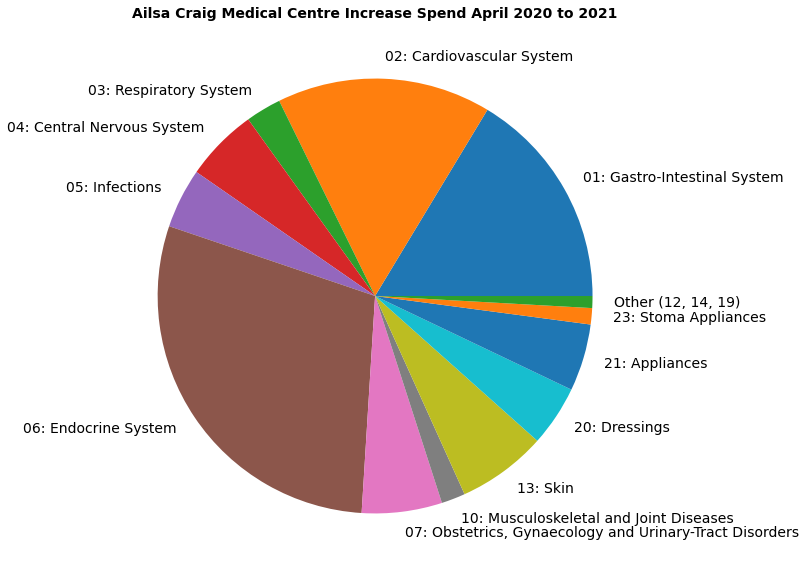

In [38]:
plot = df.plot.pie(y='RAW_DIFFERENCE', figsize=(10,10), legend=None, fontsize=14, rotatelabels=False)
plt.title('Ailsa Craig Medical Centre Increase Spend April 2020 to 2021', weight='bold', size=14)
plt.ylabel("")
plt.show()